In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [2]:
from Cluster import *

Getting data:
getting JHU data...
number of countries listed 274
done with JHU data.  Got  274 countries.
getting owid data...
data for population changes only slowly if at all in OWID database
done with owid data. Got 212 countries
WHO acute file found dictionary acute_who
ICU file found dictionary icus_2012
---------------------------------
Done with data.
---------------------------------
Getting deaths, case and testing data...
done.
doing piecwise linear fits to testing data ...
done.
making cases with nonlinear testing adjustment...
done.
to change the nonlinear correction function, call make_cases_adj_nonlin(K), K=2 by default
----------------------------------------
Finished loading Cluster module
----------------------------------------


In [5]:
cases = [c for c in clusdata_all]
cases

['deaths',
 'cases',
 'cases_lin2020',
 'cases_pwlfit',
 'cases_nonlin',
 'cases_nonlinr']

In [6]:
datasets = ['deaths','cases','cases_lin2020','cases_pwlfit','cases_nonlin']

d_countries = [c for c in clusdata_all['deaths']]
c_countries = [c for c in clusdata_all['cases']]
lc_countries = [c for c in clusdata_all['cases_lin2020']]
pc_countries = [c for c in clusdata_all['cases_pwlfit']]
nc_countries = [c for c in clusdata_all['cases_nonlin']]

countries = d_countries

In [7]:
# check that all country sets being used are the same and check time series lengths and starting dates
countrysets = [d_countries,c_countries,lc_countries,pc_countries,nc_countries]
print([len(ccs) for ccs in countrysets])
for ccs1 in countrysets:
    print([ccs1 == ccs2 for ccs2 in countrysets])
print([len(clusdata_all[d1]['United States']) for d1 in datasets])
print(len(total_deaths_x['dates']),len(total_cases_x['dates']),len(testing_x['dates']),total_deaths_x['dates'][0],total_cases_x['dates'][0],testing_x['dates'][0])

[68, 68, 68, 68, 68]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[153, 153, 153, 153, 153]
269 269 269 12/31/19 12/31/19 12/31/19


In [8]:
# 61 countries on Sep 24 with mindeaths=200 and mindays=160
# note that changing the minimal common active epidemic time series length mindays from 160 to 150 included only 4 new countries on Sep 24
# decreasing minimal total death count from 200 to 100 included only 3 new countries on Sep 24 
# doing both included 7 new countries : 68 in total 
len(testing_x['dates'])

269

# ClusterFit testing

In [7]:
np.argsort(list(range(4,14)))[-1:][0]

9

16000 2 seats

In [8]:

base = '../../covid-19-JH/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_jhu = get_data(base+'time_series_covid19_confirmed_global.csv')
deaths_jhu = get_data(base+'time_series_covid19_deaths_global.csv')

In [9]:
[x for x in dir() if 'death' in x]

['deaths',
 'deaths_jhu',
 'deaths_owid',
 'deaths_raw',
 'mindeaths',
 'new_deaths_spm',
 'new_deaths_spm_x',
 'short_deaths',
 'short_deaths_c',
 'short_deaths_est',
 'total_deaths',
 'total_deaths_x']

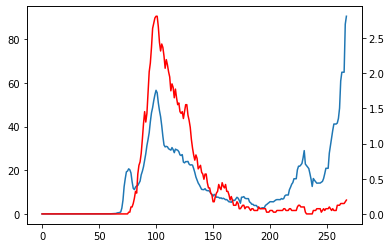

In [10]:
fig,ax = plt.subplots()
ax.plot(new_cases_spm['Denmark'])
axx = ax.twinx()
axx.plot(new_deaths_spm['Denmark'],color='red');


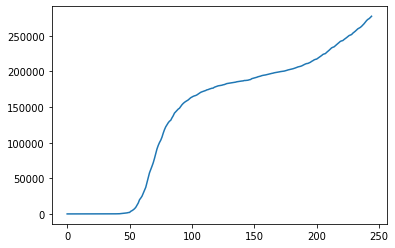

In [11]:

plt.plot(confirmed_jhu[('Germany','')])

## cases

In [ ]:
len(clusdata_all['cases'])

In [ ]:
#foo = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foo.umap_cluster(5,5,n_neighbors=6)
print('mean cluster membership probability =',np.mean(foo.clus_probs))
foo.plot_umap()

In [ ]:
foo.clus_labels
print(len(foo.clus_labels))
print(len(c_countries))

In [ ]:
foo.clus_labels

In [ ]:
labelled = [(foo.clus_labels[i],c_countries[i]) for i in range(len(foo.clus_labels))]
print(labelled)

In [ ]:
np.lexsort((c_countries,foo.clus_labels))

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=4,n_neighbors=6)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.clus_labels

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## cases FFT

In [ ]:
len(clusdata_all['cases'])

In [ ]:
foofft = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['cases'],fft=None) 

In [ ]:
foofft.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foofft.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
np.mean(foofft.clus_probs)

In [ ]:
foofft.clus_labels

In [ ]:
foofft.cluster_plot_all()

In [ ]:
foofft.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foofft.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foofft.clus_labels)))
    clprobs.append(np.mean(foofft.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foofft

## deaths

In [ ]:
len(clusdata_all['deaths'])

In [ ]:
foo = ClusterFit(clusdata_all['deaths']) # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['deaths'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['deaths'],fft=None) 

In [ ]:
foo.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foo.plot_umap()

In [ ]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=3)

In [ ]:
foo.plot_umap()

In [ ]:
np.mean(foo.clus_probs)

In [ ]:
foo.cluster_plot_all()

In [ ]:
foo.plot_pcas()

In [ ]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

In [ ]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

In [ ]:
# min_size = 6
plt.scatter(clsize,clprobs)

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

In [ ]:
plt.hist(clsize);

In [ ]:
plt.hist(clprobs);

In [ ]:
clusfit_all = {}
clusfit_all['cases'] = foo

## deaths FFT

In [ ]:
foofft = ClusterFit(clusdata_all['deaths'],fft='fft')

In [ ]:
foofft.umap_cluster(3) # arg = random seed

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.umap_best_cluster()

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.plot_pcas()

In [ ]:
clusfit_all['deaths'] = foofft

# Plots of all countries

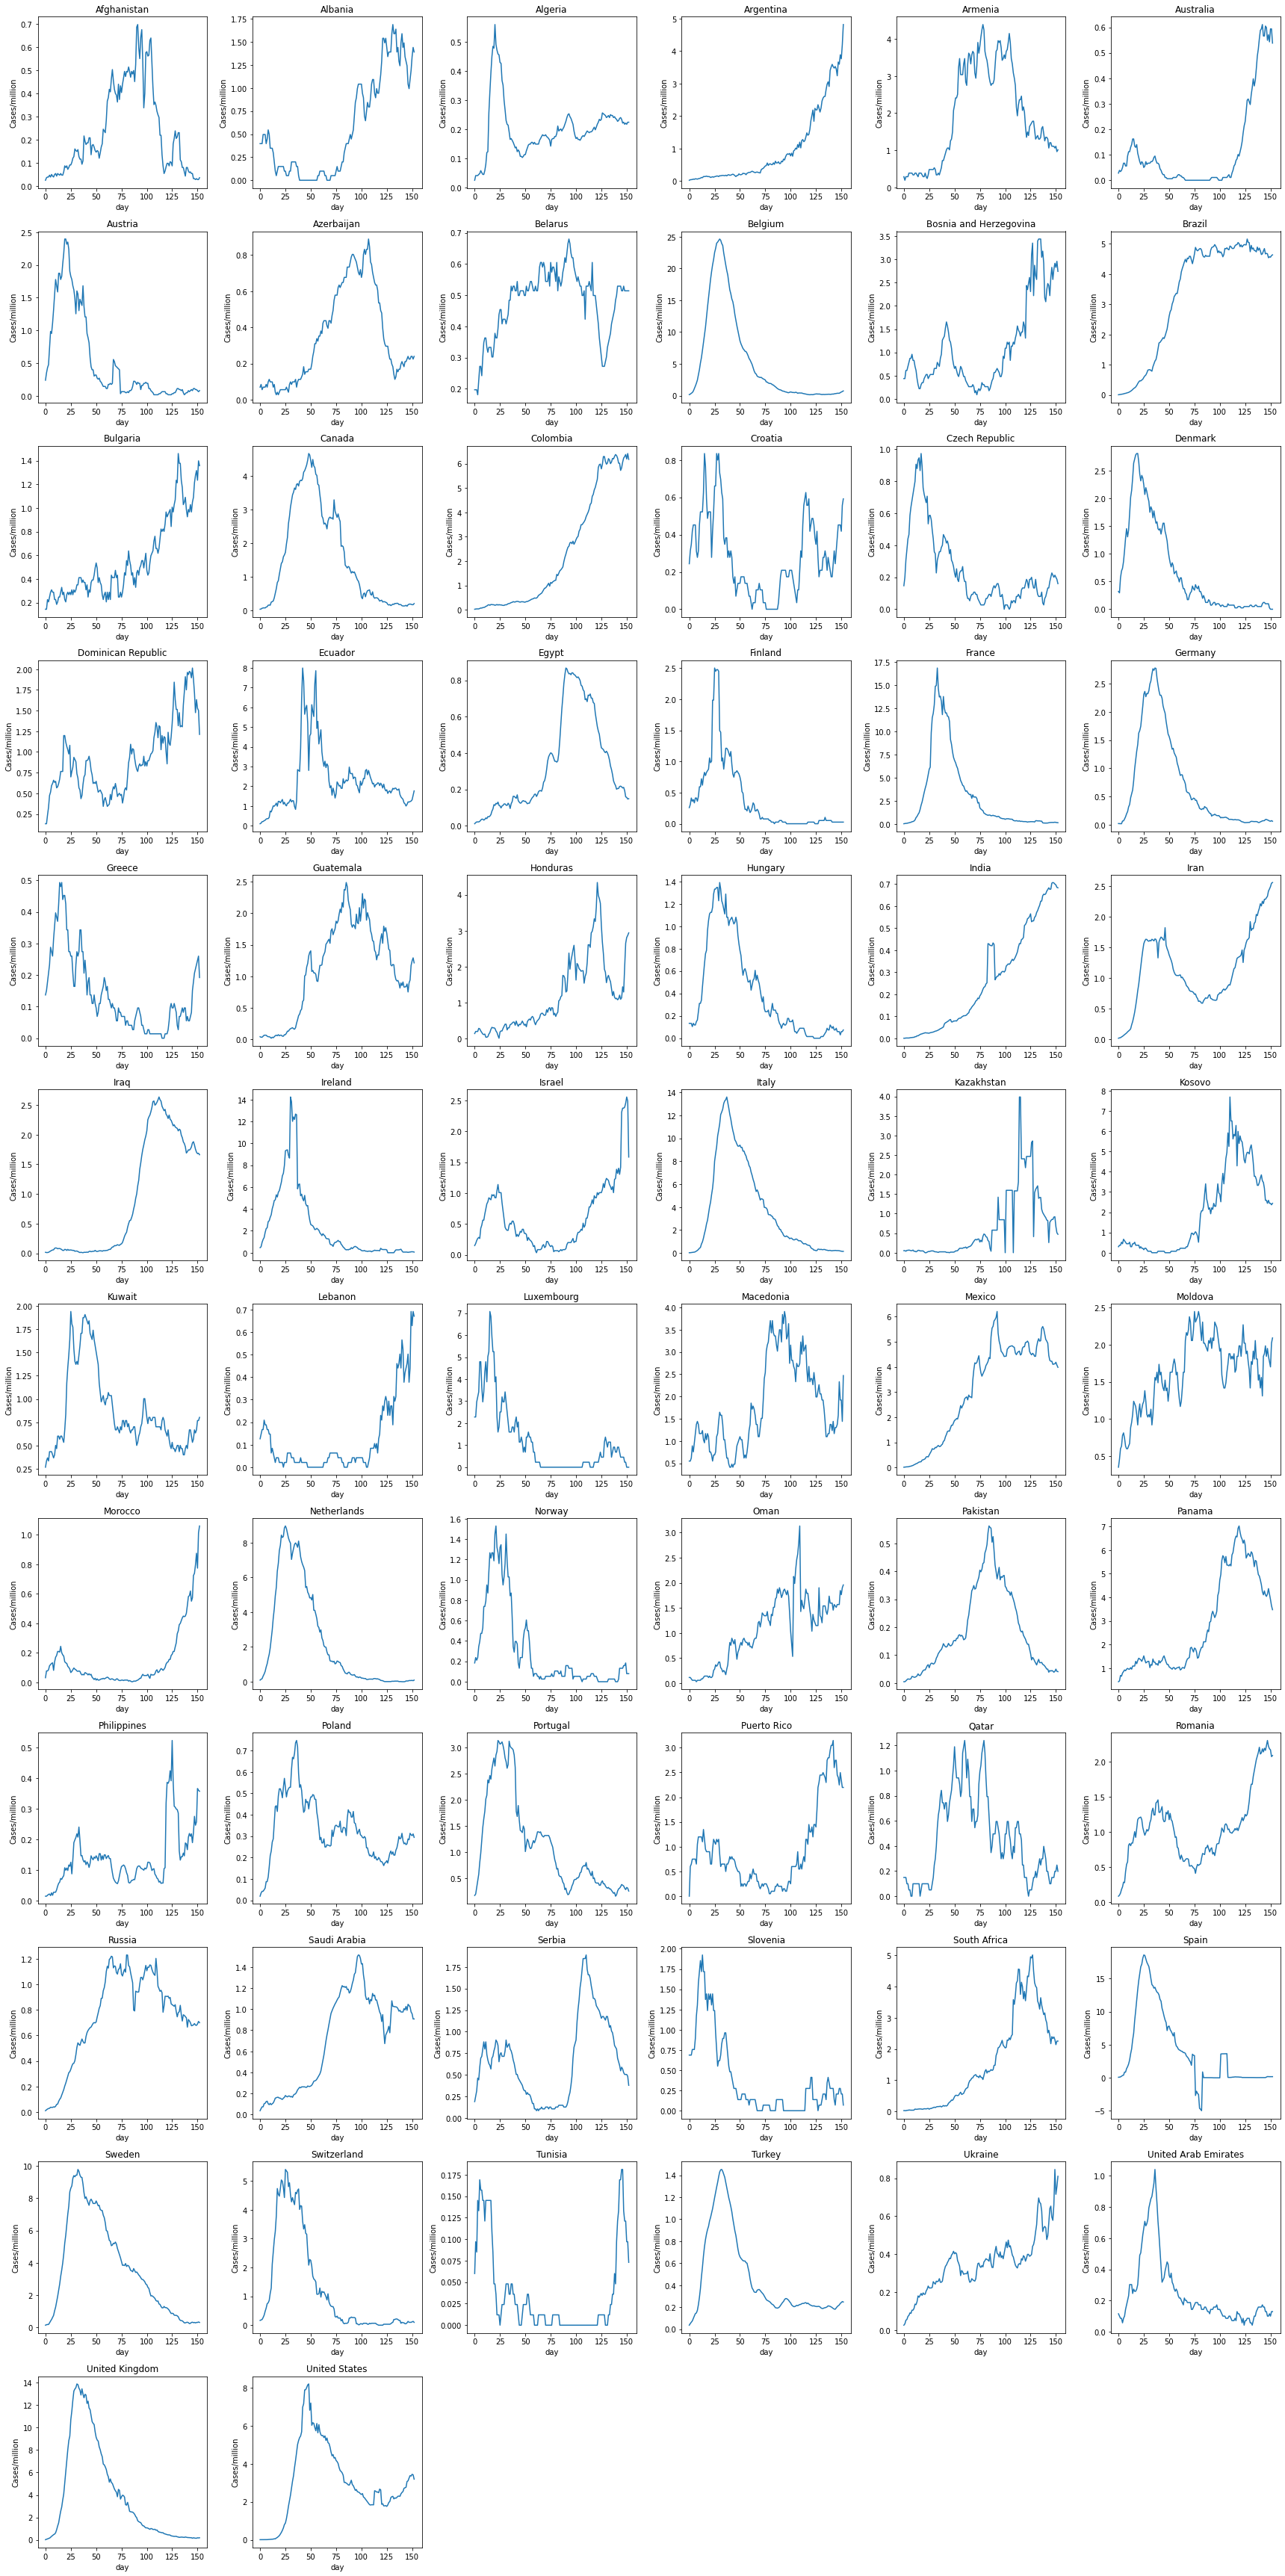

In [9]:
plot_all(countries,clusdata_all['deaths'])

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlin'],longshort_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr'],longshort_reg_testing_c)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_pwlfit'],longshort_reg_testing_c)

In [ ]:
plot_all(lcountries,cases_raw,cases_adj_lin2020)

# Compare best clusters

In [ ]:
datasets = [c for c in clusdata_all]
datasets

In [ ]:
len(countries)

In [ ]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr']);

In [ ]:
#  Norman not sure I understand what you are printing out with "found 48 clusters of size 3" , seems wrong
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    mfit.umap_best_cluster()
    res[d] = mfit

In [ ]:
for rr in res:
    foo = res[rr]
    # foo.plot_umap() ########## doesn't work???
    plt.scatter(foo.um_dat[0],foo.um_dat[1],c=foo.clus_labels)
    plt.title(rr)
    plt.show()

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn

def match1(a,x):
    rtn = [1 for i in range(len(a)) if a[i] == x]
    return rtn
    
def imxcor(clusters,nset,n,nclus,nclusmax=6): 
    """ finds cluster index in previous datasets d best correlated to cluster n in dataset dd
        nclus is current number of already aligned clusters
        nclusmax is max allowed number of clusters
    """
    cx = []
    cc = clusters[nset]
    for j in range(0,nset):
        c = mapclusters[j]
        klen = min(nclusmax,len(cc))
        for k in range(nclus): # find best matching previous cluster
            cx.append(np.sum(match1(cc,n)*match1(c,k)))
    return argmax(cx),max(cx)

In [ ]:
maxclusters = 6
clusters = [res[d].clus_labels for d in res]
ncountries = len(res['deaths'])
mapclusters = np.zeros((len(clusters),ncountries)
mapclusters[0,:] = clusters[0,:] # class lables are those of deaths to start, may be expanded
corclasses = np.zeros((len(classes),len(classes)))
c = clusters[0] # the first dataset clusters are all accepted as first clusters
nclusters = len(set(c))                    
for j in range(1,len(clusters)):
    cc = clusters[j] # clus_labels for jth dataset
                      # map clusters to best matching cluster in 0th dataset : losers try with other previous datasets : losers new
    for k in set(cc):
                       i,cor = imxcor(k,cc,nclusmax=nclasses)
                       
    corclasses[i,j] = mxcor(c,cc)
    corclasses[j,i] = corclasses[i,j]
for i in range(len(classes)):
    corclasses[i,i] = 1.0
plt.imshow(corclasses)    

In [ ]:
print([(i,c,np.mean(corclasses[i,:])) for i,c in enumerate([r for r in res])])

In [ ]:
for i in range(6):
    plt.plot(list(range(6)),corclasses[i,:])

Note: `cases_nonlin` and `cases_nonlinr` currently same.

**Cluster correlations not outstandingly high!**

In [ ]:
foo = res['cases_nonlin']

In [ ]:
def plot_adj(country, data, adj = None, testing=None,  ndays=250, axis = None):
    ndays = 250
    if testing:
        # Ntests = regtests(testing,country)  # this does not work here, since data is already synchronized, use regularized data in testing 
        Ntests = testing[country]
    if axis is None:   
        fig, ax1 = plt.subplots(figsize=(12,8))
    else:
        ax1 = axis
    ax1.plot(data[country][:ndays]) 
    if adj is not None:  # already adjusted
        ax1.plot(adj[country][:ndays])
    ax1.set_title(country)
    ax1.set_ylabel('Cases/million')
    ax1.set_xlabel('day')
    if testing:
        ax2 = ax1.twinx()
        ax2.plot(Ntests[:ndays],color='red',alpha=0.4)
        ax2.set_ylabel('Testing/1000')

        
def plot_all(countries,dat,adj=None,testing=None,ndays=250):
    max_cols=6
    max_rows=int(len(countries)/max_cols) + 1
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

    for idx, country  in enumerate(countries):
        row = idx // max_cols
        col = idx % max_cols
        plot_adj(country,dat,adj,testing,ndays,axis=axes[row,col])
    for idx in range(len(countries),max_rows*max_cols):
        row = idx // max_cols
        col = idx % max_cols
        axes[row, col].axis("off")
    #plt.subplots_adjust(wspace=.05, hspace=.05)
    fig.tight_layout()
    #for ax in fig.get_axes():
    #    ax.label_outer()
    plt.show()


In [ ]:
plt.plot(foo.smoothed[0])

In [ ]:
len(foo.dat[0,:])

In [ ]:
dat1 = {countries[i]:foo.dat[i,:] for i in range(len(countries))}
dat2 = {countries[i]:foo.smoothed[i,:] for i in range(len(countries))}
plot_all(countries,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus0 = [i for i,x in enumerate(res[cc].clus_labels) if x==0]

count0 = [countries[i] for i in clus0]
plot_all(count0,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==1]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==2]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

# Hdbscan on raw data

In [10]:
foo = list(range(10))
foo[3]='red'
foo

[0, 1, 2, 'red', 4, 5, 6, 7, 8, 9]

In [11]:
foodeath = ClusterFit(clusdata_all['deaths'])


In [12]:
foodeath.hdbscan()

cluster validity index = 0.2517561258472161
cluster validity of each cluster:
cluster 0 validity = 0.2517561258472161
cluster 0 validity = [0.25043806 0.30013505]


In [13]:
foodeath.umap(n_neighbors=4)

In [14]:
len(foodeath.clus_labels)

68

In [15]:
foodeath.clus_labels

array([ 0,  0,  0,  0,  0,  0,  1,  0, -1,  1,  0,  0,  0,  1,  0, -1,  1,
        1,  0, -1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,
        0,  1,  0,  0,  0, -1,  1,  0,  1,  1,  1, -1,  1,  0,  1,  1,  1])

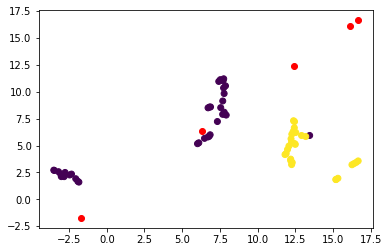

In [16]:
foodeath.plot_umap()

# hdbscan on raw PCA

In [17]:
foodeath = ClusterFit(clusdata_all['deaths'])

In [18]:
foodeath.hdbscan_pca()

shape of cluster data =  (68, 10)
cluster validity index = 0.31917787455795554
cluster validity of each cluster:
cluster 1 validity = 0.31917787455795554
cluster 1 validity = [0.40654667 0.32507077]


In [19]:
foodeath.umap(n_neighbors=4)

In [20]:
len(foodeath.clus_labels)

68

In [21]:
foodeath.clus_labels

array([ 1,  1,  0,  1,  1,  1,  0,  1, -1,  0,  1, -1,  1,  0,  1, -1,  0,
        0,  1, -1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  0,
        1,  1,  0,  1,  0,  1,  1, -1,  1,  0,  0,  1,  1,  1,  1,  0,  0,
        1, -1,  1,  1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  1,  0,  0,  0])

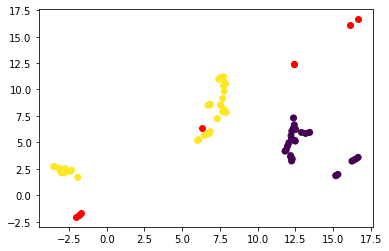

In [22]:
foodeath.plot_umap()

# FPCA

[Example](https://fda.readthedocs.io/en/latest/auto_examples/plot_fpca.html#sphx-glr-auto-examples-plot-fpca-py) of FPCA...

Also: see same example in the fpca_example notebook.

Also:  see [documentation](https://fda.readthedocs.io/en/latest/modules/preprocessing/dim_reduction/autosummary/skfda.preprocessing.dim_reduction.projection.FPCA.html?highlight=fpca) for FPCA.

## Using raw data (as discrete samples)

### Preliminary scratch...

In [23]:
dat = foodeath.dat

In [24]:
foodeath.fitted.shape

(68, 10)

In [25]:
dat.shape

(68, 153)

In [26]:
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial



In [27]:
len(dat[0])

153

Configure data a samples of a function on a grid, specify the grid as list of days:

In [28]:
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

In [29]:
len(dat_disc)

68

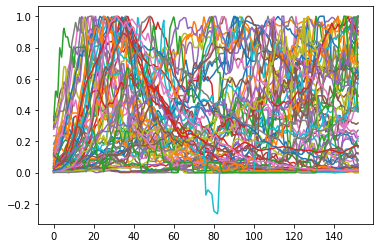

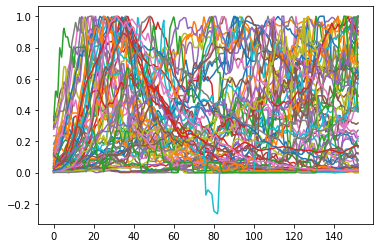

In [30]:
dat_disc.plot()

Text(0.5, 1.0, 'Spain')

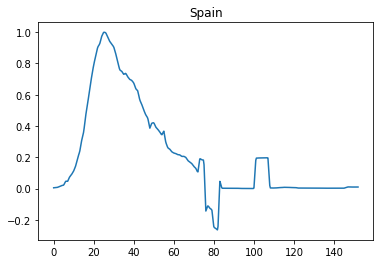

In [31]:
idx = [i for i,x in enumerate(countries) if x=="Spain"][0]
dat_disc[idx].plot()
plt.title(countries[idx])

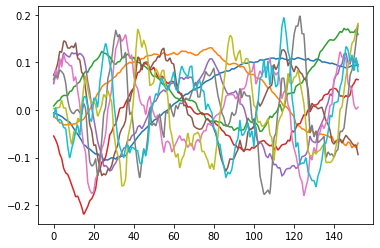

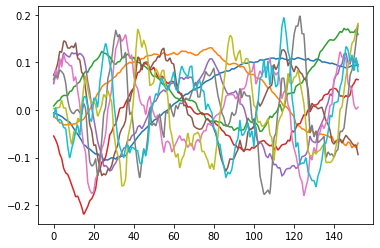

In [32]:
fpca_disc = FPCA(n_components=10)
fpca_disc.fit(dat_disc)
fpca_disc.components_.plot()


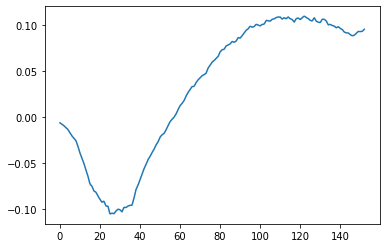

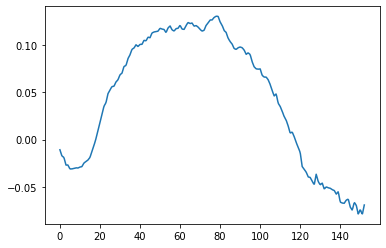

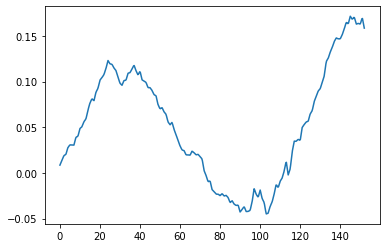

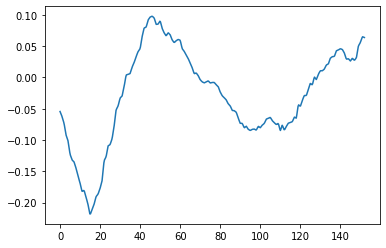

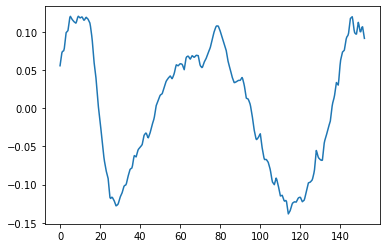

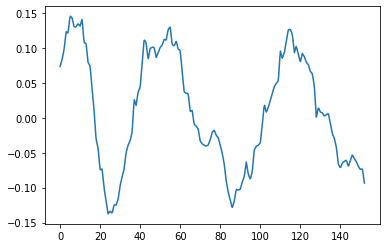

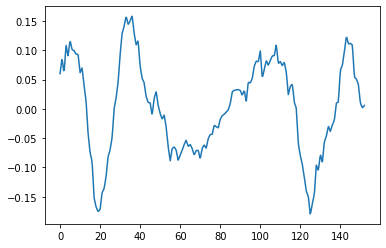

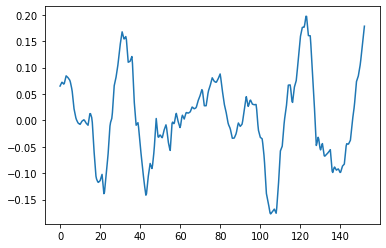

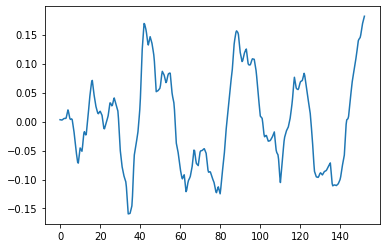

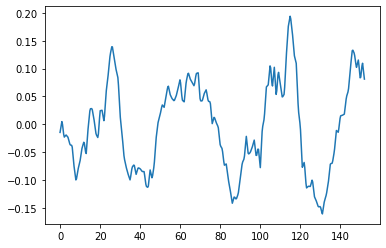

In [33]:
max_cols = 5
max_rows = len(fpca_disc.components_) // max_cols
#fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,max_rows*3.5))
for i in range(len(fpca_disc.components_)):
    row = i // max_cols
    col = i % max_cols
    #axes[row, col].axis("off")
    fpca_disc.components_[i].plot()


In [34]:
foo = fpca_disc.transform(dat_disc)

In [35]:
[x for x in dir(fpca_disc) if 'transform' in x]

['_transform_basis', '_transform_grid', 'fit_transform', 'transform']

In [36]:
type(foo)

numpy.ndarray

In [37]:
foo.shape

(68, 10)

In [38]:
foo.shape

(68, 10)

In [39]:
for minc in range(2,8):
    for ncomp in range(5,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   5 FPCAcomponents:   4 clusters;   61 clustered;   7 unclustered;  validity = 0.288
hdbscan_min_clus= 2 :   6 FPCAcomponents:   7 clusters;   56 clustered;   12 unclustered;  validity = None
hdbscan_min_clus= 2 :   7 FPCAcomponents:   5 clusters;   63 clustered;   5 unclustered;  validity = 0.277
hdbscan_min_clus= 2 :   8 FPCAcomponents:   5 clusters;   61 clustered;   7 unclustered;  validity = None
hdbscan_min_clus= 2 :   9 FPCAcomponents:   4 clusters;   64 clustered;   4 unclustered;  validity = 0.123
hdbscan_min_clus= 2 :   10 FPCAcomponents:   3 clusters;   60 clustered;   8 unclustered;  validity = 0.316
--------------------------
hdbscan_min_clus= 3 :   5 FPCAcomponents:   3 clusters;   56 clustered;   12 unclustered;  validity = 0.188
hdbscan_min_clus= 3 :   6 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.106
hdbscan_min_clus= 3 :   7 FPCAcomponents:   2 clusters;   62 clustered;   6 unclustered;  validity = 0.093
hdbscan_

In [40]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   4 clusters;   46 clustered;   22 unclustered;  validity = 0.304
hdbscan_min_clus= 2 :   4 FPCAcomponents:   3 clusters;   53 clustered;   15 unclustered;  validity = 0.413
hdbscan_min_clus= 2 :   5 FPCAcomponents:   3 clusters;   56 clustered;   12 unclustered;  validity = 0.188
hdbscan_min_clus= 2 :   6 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.106
hdbscan_min_clus= 2 :   7 FPCAcomponents:   2 clusters;   62 clustered;   6 unclustered;  validity = 0.093
hdbscan_min_clus= 2 :   8 FPCAcomponents:   2 clusters;   63 clustered;   5 unclustered;  validity = 0.289
hdbscan_min_clus= 2 :   9 FPCAcomponents:   2 clusters;   63 clustered;   5 unclustered;  validity = 0.294
hdbscan_min_clus= 2 :   10 FPCAcomponents:   2 clusters;   63 clustered;   5 unclustered;  validity = 0.301
--------------------------
hdbscan_min_clus= 3 :   3 FPCAcomponents:   4 clusters;   46 clustered;   22 unclustered;  validity = 0.304
hdbs

In [41]:
labels

array([ 0,  0,  1,  0,  0,  0,  1,  0, -1,  1,  0,  0,  0,  1,  0, -1,  1,
        1,  0, -1,  0,  1,  1,  1,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,
        0,  1,  0,  0,  0, -1,  1,  0,  1,  1,  1, -1,  1,  0,  1,  1,  1])

### integrated into ClusterFit

In [42]:
foo = ClusterFit(clusdata_all['deaths'])

In [43]:
foo.hdbscan_fpca()

hdbscan_min_clus= 4 :   5 FPCAcomponents:   3 clusters;   35 clustered;   33 unclustered;  validity = 0.293


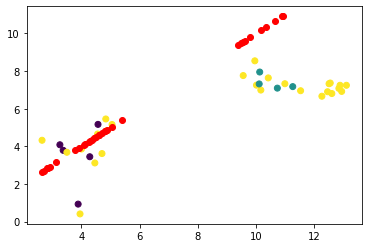

In [44]:
foo.umap()
foo.plot_umap()

### Cases

In [45]:
foocases = ClusterFit(clusdata_all['cases'])
dat = foocases.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [46]:
min_samples = 4
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   5 clusters;   46 clustered;   22 unclustered;  validity = None
hdbscan_min_clus= 2 :   4 FPCAcomponents:   5 clusters;   39 clustered;   29 unclustered;  validity = 0.24
hdbscan_min_clus= 2 :   5 FPCAcomponents:   5 clusters;   39 clustered;   29 unclustered;  validity = 0.271
hdbscan_min_clus= 2 :   6 FPCAcomponents:   7 clusters;   41 clustered;   27 unclustered;  validity = None
hdbscan_min_clus= 2 :   7 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.287
hdbscan_min_clus= 2 :   8 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.289
hdbscan_min_clus= 2 :   9 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.275
hdbscan_min_clus= 2 :   10 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.292
--------------------------
hdbscan_min_clus= 3 :   3 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.265
hdb

### Cases adj_nonlin

In [47]:
foocases_nonlin = ClusterFit(clusdata_all['cases_nonlin'])
dat = foocases_nonlin.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))
foo = fpca_disc.transform(dat_disc)

In [48]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,16):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   6 clusters;   49 clustered;   19 unclustered;  validity = None
hdbscan_min_clus= 2 :   4 FPCAcomponents:   7 clusters;   40 clustered;   28 unclustered;  validity = None
hdbscan_min_clus= 2 :   5 FPCAcomponents:   8 clusters;   43 clustered;   25 unclustered;  validity = None
hdbscan_min_clus= 2 :   6 FPCAcomponents:   8 clusters;   44 clustered;   24 unclustered;  validity = None
hdbscan_min_clus= 2 :   7 FPCAcomponents:   7 clusters;   41 clustered;   27 unclustered;  validity = None
hdbscan_min_clus= 2 :   8 FPCAcomponents:   8 clusters;   45 clustered;   23 unclustered;  validity = None
hdbscan_min_clus= 2 :   9 FPCAcomponents:   7 clusters;   41 clustered;   27 unclustered;  validity = None
hdbscan_min_clus= 2 :   10 FPCAcomponents:   7 clusters;   41 clustered;   27 unclustered;  validity = 0.29037
hdbscan_min_clus= 2 :   11 FPCAcomponents:   7 clusters;   41 clustered;   27 unclustered;  validity = 0.26493
hdbscan_min_clus= 2 :   12 FP

### Scan of optimal clusterings for 6 datasets and 4 clustering quality criteria

The validity calculated by hdbscan does seem to bias lower dimensional embeddings. We study this in a separate notebook "Calibration_of_Validity". Here we consider 4 scorings: the validity, the dimensionality scaled validity, and two combined scorings which also penalizes the number of unclustered points as well as how far the number of clusters departs from 4.

In [49]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)

for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.

    for minc in range(3,10):
        min_samples = 2
        for ncomp in range(2,16):  # code will only work if reference value 2 included in range
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])

            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)

                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)

                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.3929 validitysc = 0.3929 score1: 5.145 score2: 6.617
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   65 clustered;   3 unclustered;  validity = 0.21303 validitysc = 0.2756 score1: 4.228 score2: 2.177
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.14563 validitysc = 0.22396 score1: 5.665 score2: 5.358
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   53 clustered;   15 unclustered;  validity = 0.30613 validitysc = 0.45813 score1: 5.683 score2: 8.185
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   6 clusters;   54 clustered;   14 unclustered;  validity = 0.30825 validitysc = 0.48325 score1: 5.869 score2: 8.691
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   7 clusters;   56 clustered;   12 unclustered;  validity = 0.2663

hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.30574 validitysc = 0.54361 score1: 3.24 score2: 1.104
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.22603 validitysc = 0.44913 score1: 3.627 score2: 1.336
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.23169 validitysc = 0.45708 score1: 3.588 score2: 1.313
hdbscan:  6 minc:   2 mins:   14 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.23613 validitysc = 0.46323 score1: 3.559 score2: 1.295
hdbscan:  6 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.24632 validitysc = 0.4771 score1: 3.496 score2: 1.258
--------------------------
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194

hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   7 clusters;   45 clustered;   23 unclustered;  validity = 0.37642 validitysc = 0.50545 score1: 8.078 score2: 15.926
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   6 clusters;   50 clustered;   18 unclustered;  validity = 0.24271 validitysc = 0.38049 score1: 7.228 score2: 14.192
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   7 clusters;   43 clustered;   25 unclustered;  validity = 0.29423 validitysc = 0.46664 score1: 8.643 score2: 18.751
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   7 clusters;   45 clustered;   23 unclustered;  validity = 0.33459 validitysc = 0.53113 score1: 7.983 score2: 15.156
hdbscan:  3 minc:   2 mins:   8 FPCAcomponents:   7 clusters;   43 clustered;   25 unclustered;  validity = 0.31202 validitysc = 0.51975 score1: 8.424 score2: 16.835
hdbscan:  3 minc:   2 mins:   9 FPCAcomponents:   7 clusters;   44 clustered;   24 unclustered;  validity = 0.30587 validitysc = 0.52458 score1: 8.206 score2: 16.013
hdbs

hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   59 clustered;   9 unclustered;  validity = 0.15689 validitysc = 0.20731 score1: 6.624 score2: 8.683
hdbscan:  7 minc:   2 mins:   4 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.27745 validitysc = 0.394 score1: 5.038 score2: 6.345
hdbscan:  7 minc:   2 mins:   5 FPCAcomponents:   2 clusters;   59 clustered;   9 unclustered;  validity = 0.174 validitysc = 0.28758 score1: 6.277 score2: 9.389
hdbscan:  7 minc:   2 mins:   6 FPCAcomponents:   2 clusters;   62 clustered;   6 unclustered;  validity = 0.08056 validitysc = 0.15531 score1: 8.639 score2: 11.59
hdbscan:  7 minc:   2 mins:   7 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.1227 validitysc = 0.23959 score1: 6.574 score2: 8.765
hdbscan:  7 minc:   2

hdbscan:  3 minc:   2 mins:   13 FPCAcomponents:   6 clusters;   44 clustered;   24 unclustered;  validity = 0.32782 validitysc = 0.57655 score1: 7.534 score2: 12.488
hdbscan:  3 minc:   2 mins:   14 FPCAcomponents:   6 clusters;   45 clustered;   23 unclustered;  validity = 0.33225 validitysc = 0.58143 score1: 7.32 score2: 11.867
hdbscan:  3 minc:   2 mins:   15 FPCAcomponents:   6 clusters;   46 clustered;   22 unclustered;  validity = 0.17552 validitysc = 0.37277 score1: 8.083 score2: 17.705
--------------------------
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   6 clusters;   61 clustered;   7 unclustered;  validity = 0.22325 validitysc = 0.22325 score1: 6.879 score2: 9.406
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   8 clusters;   50 clustered;   18 unclustered;  validity = 0.39401 validitysc = 0.47749 score1: 7.694 score2: 15.079
hdbscan:  4 minc:   2 mins:   4 FPCAcomponents:   6 clusters;   45 clustered;   23 unclustered;  validity = 0.35864 validitysc = 0.48633 score1

hdbscan:  7 minc:   2 mins:   13 FPCAcomponents:   4 clusters;   47 clustered;   21 unclustered;  validity = 0.28889 validitysc = 0.53143 score1: 6.082 score2: 7.903
hdbscan:  7 minc:   2 mins:   14 FPCAcomponents:   4 clusters;   47 clustered;   21 unclustered;  validity = 0.29185 validitysc = 0.53501 score1: 6.069 score2: 7.85
hdbscan:  7 minc:   2 mins:   15 FPCAcomponents:   4 clusters;   47 clustered;   21 unclustered;  validity = 0.19386 validitysc = 0.40168 score1: 6.69 score2: 10.456
--------------------------
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.10368 validitysc = 0.10368 score1: 12.145 score2: 24.113
hdbscan:  8 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   45 clustered;   23 unclustered;  validity = 0.15324 validitysc = 0.20278 score1: 9.532 score2: 22.685
hdbscan:  8 minc:   2 mins:   4 FPCAcomponents:   3 clusters;   56 clustered;   12 unclustered;  validity = 0.32109 validitysc = 0.44468 score1

hdbscan:  4 minc:   2 mins:   11 FPCAcomponents:   5 clusters;   44 clustered;   24 unclustered;  validity = 0.32524 validitysc = 0.56592 score1: 7.067 score2: 10.602
hdbscan:  4 minc:   2 mins:   12 FPCAcomponents:   5 clusters;   43 clustered;   25 unclustered;  validity = 0.21746 validitysc = 0.43688 score1: 7.789 score2: 14.306
hdbscan:  4 minc:   2 mins:   13 FPCAcomponents:   5 clusters;   44 clustered;   24 unclustered;  validity = 0.21154 validitysc = 0.42824 score1: 7.635 score2: 14.011
hdbscan:  4 minc:   2 mins:   14 FPCAcomponents:   5 clusters;   44 clustered;   24 unclustered;  validity = 0.20852 validitysc = 0.4238 score1: 7.66 score2: 14.158
hdbscan:  4 minc:   2 mins:   15 FPCAcomponents:   5 clusters;   44 clustered;   24 unclustered;  validity = 0.21233 validitysc = 0.4294 score1: 7.629 score2: 13.973
--------------------------
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   7 clusters;   55 clustered;   13 unclustered;  validity = 0.34913 validitysc = 0.34913 scor

hdbscan:  8 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.32643 validitysc = 0.57501 score1: 5.739 score2: 7.826
hdbscan:  8 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.32831 validitysc = 0.57709 score1: 5.733 score2: 7.798
hdbscan:  8 minc:   2 mins:   14 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.33296 validitysc = 0.58221 score1: 5.718 score2: 7.729
hdbscan:  8 minc:   2 mins:   15 FPCAcomponents:   3 clusters;   48 clustered;   20 unclustered;  validity = 0.14673 validitysc = 0.32436 score1: 7.583 score2: 15.415
--------------------------
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   60 clustered;   8 unclustered;  validity = 0.13186 validitysc = 0.13186 score1: 9.684 score2: 15.167
hdbscan:  9 minc:   2 mins:   3 FPCAcomponents:   3 clusters;   39 clustered;   29 unclustered;  validity = 0.28396 validitysc = 0.35788 score1

hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33124 validitysc = 0.55363 score1: 5.206 score2: 6.503
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.32151 validitysc = 0.55288 score1: 5.409 score2: 7.054
hdbscan:  5 minc:   2 mins:   11 FPCAcomponents:   3 clusters;   49 clustered;   19 unclustered;  validity = 0.34501 validitysc = 0.58757 score1: 6.002 score2: 8.084
hdbscan:  5 minc:   2 mins:   12 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.30354 validitysc = 0.54889 score1: 5.722 score2: 7.743
hdbscan:  5 minc:   2 mins:   13 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.26775 validitysc = 0.50515 score1: 6.08 score2: 8.908
hdbscan:  5 minc:   2 mins:   14 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.24035 validitysc = 0.46901 score1: 6.232 score2: 9.595
hdbsca

hdbscan:  9 minc:   2 mins:   6 FPCAcomponents:   2 clusters;   64 clustered;   4 unclustered;  validity = 0.001 validitysc = 0.0021 score1: 478.829 score2: 572.435
hdbscan:  9 minc:   2 mins:   7 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.22345 validitysc = 0.39328 score1: 5.943 score2: 9.154
hdbscan:  9 minc:   2 mins:   8 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.22447 validitysc = 0.40853 score1: 6.048 score2: 9.547
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.33124 validitysc = 0.55363 score1: 5.206 score2: 6.503
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.32151 validitysc = 0.55288 score1: 5.409 score2: 7.054
hdbscan:  9 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.32352 validitysc = 0.56399 score1: 5.373 score2: 6.915
hdbscan:

hdbscan:  5 minc:   2 mins:   15 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.2972 validitysc = 0.54141 score1: 5.747 score2: 7.85
--------------------------
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   5 clusters;   60 clustered;   8 unclustered;  validity = 0.40911 validitysc = 0.40911 score1: 4.544 score2: 4.889
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   53 clustered;   15 unclustered;  validity = 0.42001 validitysc = 0.50441 score1: 5.483 score2: 7.434
hdbscan:  6 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   52 clustered;   16 unclustered;  validity = 0.27186 validitysc = 0.38731 score1: 5.782 score2: 8.262
hdbscan:  6 minc:   2 mins:   5 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.23388 validitysc = 0.36909 score1: 6.509 score2: 10.296
hdbscan:  6 minc:   2 mins:   6 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.31461 validitysc = 0.49065 score1: 5.93

hdbscan:  9 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.30268 validitysc = 0.54788 score1: 5.425 score2: 7.118
hdbscan:  9 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.29788 validitysc = 0.54222 score1: 5.444 score2: 7.193
hdbscan:  9 minc:   2 mins:   14 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.28975 validitysc = 0.53248 score1: 5.278 score2: 6.761
hdbscan:  9 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.28603 validitysc = 0.52796 score1: 5.294 score2: 6.819
--------------------------
---------------------------------------------------------
minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2
maxvalid  [(3, 2, 2, 10, 59, 9, 0.5722054295205845, 0.5722054295205845, 6.54762410213031, 7.864308459586395)]
maxvalidsc  [(5, 2, 8, 3, 46, 22, 0.3789616180866672, 

** move Ncomponents to outside loop**

In [51]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)

for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.

    for ncomp in range(2,16):
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])

            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)

                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)

                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.3929 validitysc = 0.3929 score1: 5.145 score2: 6.617
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   2 clusters;   60 clustered;   8 unclustered;  validity = 0.26

hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   60 clustered;   8 unclustered;  validity = 0.31586 validitysc = 0.54643 score1: 3.93 score2: 

hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   47 clustered;   21 unclustered;  validity = 0.31788 validitysc = 0.39576 score1: 7.727 score2: 15.919
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   47 clustered;   21 unclustered;  validity = 0.31788 validitysc = 0.39576 score1: 7.727 score2: 15.919
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   49 clustered;   19 unclustered;  validity = 0.30422 validitysc = 0.38062 score1: 6.927 s

hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   7 clusters;   44 clustered;   24 unclustered;  validity = 0.26877 validitysc = 0.48956 score1: 8.343 score2: 17.158
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   46 clustered;   22 unclustered;  validity = 0.24661 validitysc = 0.46068 score1: 7.571 score2: 14.327
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   60 clustered;   8 unclustered;  validity = 0.14488 validitysc = 0.30657 score1: 5.862 score2: 7.828
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   60 clustered;   8 unclustered;  validity = 0.14488 validitysc = 0.30657 score1:

hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   58 clustered;   10 unclustered;  validity = 0.10368 validitysc = 0.10368 score1: 12.145 score2: 24.113
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   53 clustered;   15 unclustered;  validity = 0.41554 validitysc = 0.49981 score1: 7.501 score2: 13.505
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   8 clusters;   50 clustered;   18 unclustered;  validity = 0.39401 validitysc = 0.47749 score1: 7.694 score2: 15.079
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   52 clustered;   16 unclustered;  validity = 0.27238 validitysc = 0.34474 score1: 7.101 score2: 13.923
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   16 unclustered;  validity = 0.21847 validitysc = 0.28206 score1: 7.245 score2: 14.181
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   16 unclustered;  validity = 0.21847 validitysc = 0.28206 score

hdbscan:  3 minc:   2 mins:   11 FPCAcomponents:   7 clusters;   43 clustered;   25 unclustered;  validity = 0.24932 validitysc = 0.47322 score1: 8.613 score2: 18.49
hdbscan:  4 minc:   2 mins:   11 FPCAcomponents:   5 clusters;   45 clustered;   23 unclustered;  validity = 0.26515 validitysc = 0.49391 score1: 7.125 score2: 11.642
hdbscan:  5 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   46 clustered;   22 unclustered;  validity = 0.27992 validitysc = 0.51254 score1: 6.351 score2: 8.585
hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   46 clustered;   22 unclustered;  validity = 0.27992 validitysc = 0.51254 score1: 6.351 score2: 8.585
hdbscan:  7 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   46 clustered;   22 unclustered;  validity = 0.27992 validitysc = 0.51254 score1: 6.351 score2: 8.585
hdbscan:  8 minc:   2 mins:   11 FPCAcomponents:   3 clusters;   55 clustered;   13 unclustered;  validity = 0.22573 validitysc = 0.44089 score1: 5.368 score2: 7.371
hdb

hdbscan:  4 minc:   2 mins:   4 FPCAcomponents:   6 clusters;   47 clustered;   21 unclustered;  validity = 0.30832 validitysc = 0.43012 score1: 7.525 score2: 14.647
hdbscan:  5 minc:   2 mins:   4 FPCAcomponents:   6 clusters;   47 clustered;   21 unclustered;  validity = 0.30832 validitysc = 0.43012 score1: 7.525 score2: 14.647
hdbscan:  6 minc:   2 mins:   4 FPCAcomponents:   5 clusters;   48 clustered;   20 unclustered;  validity = 0.25701 validitysc = 0.36936 score1: 7.207 score2: 13.537
hdbscan:  7 minc:   2 mins:   4 FPCAcomponents:   3 clusters;   56 clustered;   12 unclustered;  validity = 0.09771 validitysc = 0.15494 score1: 9.354 score2: 19.362
hdbscan:  8 minc:   2 mins:   4 FPCAcomponents:   3 clusters;   56 clustered;   12 unclustered;  validity = 0.09771 validitysc = 0.15494 score1: 9.354 score2: 19.362
hdbscan:  9 minc:   2 mins:   4 FPCAcomponents:   3 clusters;   56 clustered;   12 unclustered;  validity = 0.09771 validitysc = 0.15494 score1: 9.354 score2: 19.362
----

hdbscan:  9 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.33423 validitysc = 0.57588 score1: 5.736 score2: 7.814
--------------------------
hdbscan:  3 minc:   2 mins:   12 FPCAcomponents:   5 clusters;   43 clustered;   25 unclustered;  validity = 0.21746 validitysc = 0.43688 score1: 7.789 score2: 14.306
hdbscan:  4 minc:   2 mins:   12 FPCAcomponents:   5 clusters;   43 clustered;   25 unclustered;  validity = 0.21746 validitysc = 0.43688 score1: 7.789 score2: 14.306
hdbscan:  5 minc:   2 mins:   12 FPCAcomponents:   4 clusters;   39 clustered;   29 unclustered;  validity = 0.18821 validitysc = 0.39293 score1: 8.345 score2: 14.761
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   4 clusters;   39 clustered;   29 unclustered;  validity = 0.18821 validitysc = 0.39293 score1: 8.345 score2: 14.761
hdbscan:  7 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.32643 validitysc = 0.57501 s

hdbscan:  4 minc:   2 mins:   5 FPCAcomponents:   7 clusters;   46 clustered;   22 unclustered;  validity = 0.27524 validitysc = 0.42121 score1: 8.274 score2: 18.281
hdbscan:  5 minc:   2 mins:   5 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.23388 validitysc = 0.36909 score1: 6.509 score2: 10.296
hdbscan:  6 minc:   2 mins:   5 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.23388 validitysc = 0.36909 score1: 6.509 score2: 10.296
hdbscan:  7 minc:   2 mins:   5 FPCAcomponents:   3 clusters;   43 clustered;   25 unclustered;  validity = 0.17571 validitysc = 0.29002 score1: 8.948 score2: 21.55
hdbscan:  8 minc:   2 mins:   5 FPCAcomponents:   2 clusters;   47 clustered;   21 unclustered;  validity = 0.24233 validitysc = 0.38 score1: 7.832 score2: 16.579
hdbscan:  9 minc:   2 mins:   5 FPCAcomponents:   2 clusters;   47 clustered;   21 unclustered;  validity = 0.24233 validitysc = 0.38 score1: 7.832 score2: 16.579
-----------

hdbscan:  8 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.30268 validitysc = 0.54788 score1: 5.425 score2: 7.118
hdbscan:  9 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.30268 validitysc = 0.54788 score1: 5.425 score2: 7.118
--------------------------
hdbscan:  3 minc:   2 mins:   13 FPCAcomponents:   8 clusters;   45 clustered;   23 unclustered;  validity = 0.29766 validitysc = 0.54196 score1: 8.445 score2: 16.975
hdbscan:  4 minc:   2 mins:   13 FPCAcomponents:   6 clusters;   44 clustered;   24 unclustered;  validity = 0.32381 validitysc = 0.57208 score1: 7.548 score2: 12.586
hdbscan:  5 minc:   2 mins:   13 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.26775 validitysc = 0.50515 score1: 6.08 score2: 8.908
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.29788 validitysc = 0.54222 scor

hdbscan:  5 minc:   2 mins:   6 FPCAcomponents:   4 clusters;   45 clustered;   23 unclustered;  validity = 0.19191 validitysc = 0.33262 score1: 7.606 score2: 13.829
hdbscan:  6 minc:   2 mins:   6 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.31461 validitysc = 0.49065 score1: 5.938 score2: 8.662
hdbscan:  7 minc:   2 mins:   6 FPCAcomponents:   2 clusters;   64 clustered;   4 unclustered;  validity = 0.001 validitysc = 0.0021 score1: 478.829 score2: 572.435
hdbscan:  8 minc:   2 mins:   6 FPCAcomponents:   2 clusters;   64 clustered;   4 unclustered;  validity = 0.001 validitysc = 0.0021 score1: 478.829 score2: 572.435
hdbscan:  9 minc:   2 mins:   6 FPCAcomponents:   2 clusters;   64 clustered;   4 unclustered;  validity = 0.001 validitysc = 0.0021 score1: 478.829 score2: 572.435
--------------------------
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   7 clusters;   49 clustered;   19 unclustered;  validity = 0.28592 validitysc = 0.47424 score1: 7.

hdbscan:  3 minc:   2 mins:   14 FPCAcomponents:   8 clusters;   47 clustered;   21 unclustered;  validity = 0.26934 validitysc = 0.50718 score1: 8.172 score2: 16.562
hdbscan:  4 minc:   2 mins:   14 FPCAcomponents:   6 clusters;   46 clustered;   22 unclustered;  validity = 0.29405 validitysc = 0.53765 score1: 7.26 score2: 12.276
hdbscan:  5 minc:   2 mins:   14 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.24035 validitysc = 0.46901 score1: 6.232 score2: 9.595
hdbscan:  6 minc:   2 mins:   14 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.24035 validitysc = 0.46901 score1: 6.232 score2: 9.595
hdbscan:  7 minc:   2 mins:   14 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.24035 validitysc = 0.46901 score1: 6.232 score2: 9.595
hdbscan:  8 minc:   2 mins:   14 FPCAcomponents:   2 clusters;   56 clustered;   12 unclustered;  validity = 0.28975 validitysc = 0.53248 score1: 5.278 score2: 6.761
hdb

### stash results in data frame

In [105]:

def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = [None,None,None,None,None,None]
maxvalidval= 0.0
maxvalidsc = [None,None,None,None,None,None]
maxvalidscval= 0.0
minscore1 = [None,None,None,None,None,None]
minscore1val = 999.
minscore2 = [None,None,None,None,None,None]
minscore2val = 999.
report = [' ']*4*6
reportdata = [None]*4*6
probdata=np.zeros((4*6,len(dat)),dtype=float)
clusdata = np.zeros((4*6,len(countries)),dtype=np.integer)
info =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
infomax =  pd.DataFrame(columns=['type','minc','mins','ncomp','clustered','unclustered','validity','validitysc','score1','score2'])
cnt=0
for ic,case in enumerate(cases):
    foocase = ClusterFit(clusdata_all[case])
    dat = foocase.dat
    dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

    print('--------------------------',case,'-------------------------------')
    maxvalidval= 0.0
    maxvalidscval= 0.0
    minscore1val = 999.
    minscore2val = 999.
    for ncomp in range(2,16):  # code will only work if reference value 2 included in range
        min_samples = 2
        for minc in range(3,10):
            fpca_disc = FPCA(n_components=ncomp)
            fpca_disc.fit(dat_disc)
            foo = fpca_disc.transform(dat_disc)
            clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
            labels = clusterer.fit_predict(foo)
            nclus = len(set([x for x in labels if x>-1]))
            nclustered = sum([1 for x in labels if x>-1])
            nunclustered = sum([1 for x in labels if x==-1])
            try:
                validity = hdbscan.validity.validity_index(foo, labels)
                validity = max(validity,0.001)
                validitysc = rescale(validity,ncomp) 
                score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
                score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)
                if validity > maxvalidval:
                    maxvalidval = validity
                    maxvalid[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4,:] = clusterer.probabilities_[:]
                    clusdata[ic*4,:] = labels[:]
                    report[ic*4] = 'max normal validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if validitysc > maxvalidscval:
                    maxvalidscval = validitysc
                    maxvalidsc[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+1,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+1,:] = labels[:]
                    report[ic*4+1] = 'max scaled validity: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+1] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score1 <  minscore1val:
                    minscore1val = score1
                    minscore1[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
                    probdata[ic*4+2,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+2,:] = labels[:]
                    report[ic*4+2] = 'min combined score1: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+2] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                if score2 <  minscore2val:
                    minscore2val = score2
                    minscore2[ic] = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
                    probdata[ic*4+3,:] = clusterer.probabilities_[:]
                    clusdata[ic*4+3,:] = labels[:]
                    report[ic*4+3] = 'min combined score2: %15s,%2d,%3d,%3d,%3d,%5.2f' % (case,minc,ncomp,nclus,nunclustered,validitysc)
                    reportdata[ic*4+3] = (case,minc,ncomp,nclus,nunclustered,validity,validitysc,score1,score2)
                    
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                      nclus,'clusters;  ',
                      nclustered,'clustered;  ',
                      nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                      'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            except:
                validity=None
                print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)
            info.loc[cnt] = [case,minc,min_samples,ncomp,nclustered,nunclustered,validity,validitysc,score1,score2]
            cnt = cnt+1

        print('--------------------------')
    print('---------------------------------------------------------')
    print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
    print('maxvalid ',maxvalid[ic])
    print('maxvalidsc ',maxvalidsc[ic])
    print('minscore1',minscore1[ic])
    print('minscore2',minscore2[ic])

-------------------------- deaths -------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.3929 validitysc = 0.3929 score1: 5.145 score2: 6.617
hdbscan:  4 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   3 clusters;   52 clustered;   16 unclustered;  validity = 0.40101 validitysc = 0.40101 score1: 6.194 score2: 9.975
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   2 clusters;   60 clustered;   8 unclustered;  validity = 0.26

hdbscan:  4 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  5 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   3 clusters;   61 clustered;   7 unclustered;  validity = 0.1448 validitysc = 0.29775 score1: 5.259 score2: 5.877
----------------------

hdbscan:  5 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  6 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  7 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  8 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
hdbscan:  9 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.37599 validitysc = 0.37599 score1: 3.86 score2: 3.192
--------------------------
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   47 clustered;   21 unclustered;  validity = 0.31788 validitysc = 0.39576 score1: 7.727 score2:

hdbscan:  6 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
hdbscan:  7 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
hdbscan:  8 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
hdbscan:  9 minc:   2 mins:   9 FPCAcomponents:   2 clusters;   61 clustered;   7 unclustered;  validity = 0.07477 validitysc = 0.16831 score1: 8.341 score2: 12.477
--------------------------
hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   7 clusters;   44 clustered;   24 unclustered;  validity = 0.26877 validitysc = 0.48956 score1: 8.343 score2: 17.158
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   6 clusters;   46 clustered;   22 unclustered;  validity = 0.24661 validitysc = 0.46068 score1: 

hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   9 clusters;   53 clustered;   15 unclustered;  validity = 0.41554 validitysc = 0.49981 score1: 7.501 score2: 13.505
hdbscan:  4 minc:   2 mins:   3 FPCAcomponents:   8 clusters;   50 clustered;   18 unclustered;  validity = 0.39401 validitysc = 0.47749 score1: 7.694 score2: 15.079
hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   6 clusters;   52 clustered;   16 unclustered;  validity = 0.27238 validitysc = 0.34474 score1: 7.101 score2: 13.923
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   16 unclustered;  validity = 0.21847 validitysc = 0.28206 score1: 7.245 score2: 14.181
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   52 clustered;   16 unclustered;  validity = 0.21847 validitysc = 0.28206 score1: 7.245 score2: 14.181
hdbscan:  8 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   45 clustered;   23 unclustered;  validity = 0.15324 validitysc = 0.20278 score1: 9.532 score2: 22.685
hdbs

hdbscan:  3 minc:   2 mins:   10 FPCAcomponents:   7 clusters;   45 clustered;   23 unclustered;  validity = 0.26353 validitysc = 0.48286 score1: 8.171 score2: 16.671
hdbscan:  4 minc:   2 mins:   10 FPCAcomponents:   5 clusters;   43 clustered;   25 unclustered;  validity = 0.27844 validitysc = 0.50173 score1: 7.493 score2: 12.457
hdbscan:  5 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   48 clustered;   20 unclustered;  validity = 0.26935 validitysc = 0.4903 score1: 6.04 score2: 8.158
hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   48 clustered;   20 unclustered;  validity = 0.26935 validitysc = 0.4903 score1: 6.04 score2: 8.158
hdbscan:  7 minc:   2 mins:   10 FPCAcomponents:   4 clusters;   48 clustered;   20 unclustered;  validity = 0.26935 validitysc = 0.4903 score1: 6.04 score2: 8.158
hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   3 clusters;   57 clustered;   11 unclustered;  validity = 0.2139 validitysc = 0.41522 score1: 5.108 score2: 6.623
hdbscan: 

hdbscan:  5 minc:   2 mins:   3 FPCAcomponents:   7 clusters;   58 clustered;   10 unclustered;  validity = 0.41769 validitysc = 0.50202 score1: 5.492 score2: 6.972
hdbscan:  6 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   53 clustered;   15 unclustered;  validity = 0.29627 validitysc = 0.37174 score1: 6.19 score2: 10.088
hdbscan:  7 minc:   2 mins:   3 FPCAcomponents:   5 clusters;   53 clustered;   15 unclustered;  validity = 0.29627 validitysc = 0.37174 score1: 6.19 score2: 10.088
hdbscan:  8 minc:   2 mins:   3 FPCAcomponents:   3 clusters;   39 clustered;   29 unclustered;  validity = 0.28396 validitysc = 0.35788 score1: 9.094 score2: 20.258
hdbscan:  9 minc:   2 mins:   3 FPCAcomponents:   3 clusters;   39 clustered;   29 unclustered;  validity = 0.28396 validitysc = 0.35788 score1: 9.094 score2: 20.258
--------------------------
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   6 clusters;   47 clustered;   21 unclustered;  validity = 0.30832 validitysc = 0.43012 score1: 7

hdbscan:  8 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.10701 validitysc = 0.23821 score1: 8.198 score2: 18.891
hdbscan:  9 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   53 clustered;   15 unclustered;  validity = 0.10701 validitysc = 0.23821 score1: 8.198 score2: 18.891
--------------------------
hdbscan:  3 minc:   2 mins:   11 FPCAcomponents:   5 clusters;   44 clustered;   24 unclustered;  validity = 0.32524 validitysc = 0.56592 score1: 7.067 score2: 10.602
hdbscan:  4 minc:   2 mins:   11 FPCAcomponents:   5 clusters;   44 clustered;   24 unclustered;  validity = 0.32524 validitysc = 0.56592 score1: 7.067 score2: 10.602
hdbscan:  5 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   40 clustered;   28 unclustered;  validity = 0.31151 validitysc = 0.55032 score1: 7.417 score2: 10.176
hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   4 clusters;   40 clustered;   28 unclustered;  validity = 0.31151 validitysc = 0.55032 

hdbscan:  5 minc:   2 mins:   4 FPCAcomponents:   5 clusters;   57 clustered;   11 unclustered;  validity = 0.2526 validitysc = 0.36397 score1: 5.448 score2: 7.556
hdbscan:  6 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   52 clustered;   16 unclustered;  validity = 0.27186 validitysc = 0.38731 score1: 5.782 score2: 8.262
hdbscan:  7 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   52 clustered;   16 unclustered;  validity = 0.27186 validitysc = 0.38731 score1: 5.782 score2: 8.262
hdbscan:  8 minc:   2 mins:   4 FPCAcomponents:   2 clusters;   50 clustered;   18 unclustered;  validity = 0.26282 validitysc = 0.37642 score1: 7.257 score2: 14.346
hdbscan:  9 minc:   2 mins:   4 FPCAcomponents:   2 clusters;   50 clustered;   18 unclustered;  validity = 0.26282 validitysc = 0.37642 score1: 7.257 score2: 14.346
--------------------------
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   8 clusters;   49 clustered;   19 unclustered;  validity = 0.29102 validitysc = 0.44027 score1: 8.

hdbscan:  7 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.32352 validitysc = 0.56399 score1: 5.373 score2: 6.915
hdbscan:  8 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.32352 validitysc = 0.56399 score1: 5.373 score2: 6.915
hdbscan:  9 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.32352 validitysc = 0.56399 score1: 5.373 score2: 6.915
--------------------------
hdbscan:  3 minc:   2 mins:   12 FPCAcomponents:   8 clusters;   45 clustered;   23 unclustered;  validity = 0.30585 validitysc = 0.55158 score1: 8.413 score2: 16.679
hdbscan:  4 minc:   2 mins:   12 FPCAcomponents:   7 clusters;   42 clustered;   26 unclustered;  validity = 0.29639 validitysc = 0.54044 score1: 8.55 score2: 16.838
hdbscan:  5 minc:   2 mins:   12 FPCAcomponents:   3 clusters;   51 clustered;   17 unclustered;  validity = 0.30354 validitysc = 0.54889 scor

hdbscan:  4 minc:   2 mins:   5 FPCAcomponents:   7 clusters;   46 clustered;   22 unclustered;  validity = 0.27524 validitysc = 0.42121 score1: 8.274 score2: 18.281
hdbscan:  5 minc:   2 mins:   5 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.23388 validitysc = 0.36909 score1: 6.509 score2: 10.296
hdbscan:  6 minc:   2 mins:   5 FPCAcomponents:   4 clusters;   49 clustered;   19 unclustered;  validity = 0.23388 validitysc = 0.36909 score1: 6.509 score2: 10.296
hdbscan:  7 minc:   2 mins:   5 FPCAcomponents:   3 clusters;   43 clustered;   25 unclustered;  validity = 0.17571 validitysc = 0.29002 score1: 8.948 score2: 21.55
hdbscan:  8 minc:   2 mins:   5 FPCAcomponents:   2 clusters;   47 clustered;   21 unclustered;  validity = 0.24233 validitysc = 0.38 score1: 7.832 score2: 16.579
hdbscan:  9 minc:   2 mins:   5 FPCAcomponents:   2 clusters;   47 clustered;   21 unclustered;  validity = 0.24233 validitysc = 0.38 score1: 7.832 score2: 16.579
-----------

hdbscan:  9 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.30268 validitysc = 0.54788 score1: 5.425 score2: 7.118
--------------------------
hdbscan:  3 minc:   2 mins:   13 FPCAcomponents:   8 clusters;   45 clustered;   23 unclustered;  validity = 0.29766 validitysc = 0.54196 score1: 8.445 score2: 16.975
hdbscan:  4 minc:   2 mins:   13 FPCAcomponents:   6 clusters;   44 clustered;   24 unclustered;  validity = 0.32381 validitysc = 0.57208 score1: 7.548 score2: 12.586
hdbscan:  5 minc:   2 mins:   13 FPCAcomponents:   3 clusters;   50 clustered;   18 unclustered;  validity = 0.26775 validitysc = 0.50515 score1: 6.08 score2: 8.908
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.29788 validitysc = 0.54222 score1: 5.444 score2: 7.193
hdbscan:  7 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   55 clustered;   13 unclustered;  validity = 0.29788 validitysc = 0.54222 scor

In [89]:
info.shape

(588, 10)

In [90]:
info

,type,minc,mins,ncomp,clustered,unclustered,validity,validitysc,score1,score2
0,deaths,3,2,2,55,13,0.392899,0.392899,5.145181,6.617470
1,deaths,4,2,2,52,16,0.401014,0.401014,6.193677,9.974708
2,deaths,5,2,2,52,16,0.401014,0.401014,6.193677,9.974708
3,deaths,6,2,2,52,16,0.401014,0.401014,6.193677,9.974708
4,deaths,7,2,2,52,16,0.401014,0.401014,6.193677,9.974708
...,...,...,...,...,...,...,...,...,...,...
583,cases_nonlinr,5,2,15,51,17,0.297200,0.541406,5.747042,7.849927
584,cases_nonlinr,6,2,15,56,12,0.286034,0.527958,5.294090,6.818726
585,cases_nonlinr,7,2,15,56,12,0.286034,0.527958,5.294090,6.818726
586,cases_nonlinr,8,2,15,56,12,0.286034,0.527958,5.294090,6.818726


In [91]:
set(info['ncomp'])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [92]:
set(info['type'])

{'cases',
 'cases_lin2020',
 'cases_nonlin',
 'cases_nonlinr',
 'cases_pwlfit',
 'deaths'}

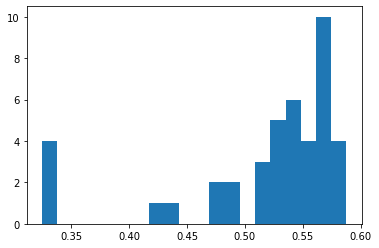

In [93]:
foo = info[info['ncomp']==11]['validitysc']
plt.hist(foo,bins=20);

In [94]:
datlen = len(set(info['ncomp']))

datlen

14

In [95]:
'ncomp = {}'.format(5)

'ncomp = 5'

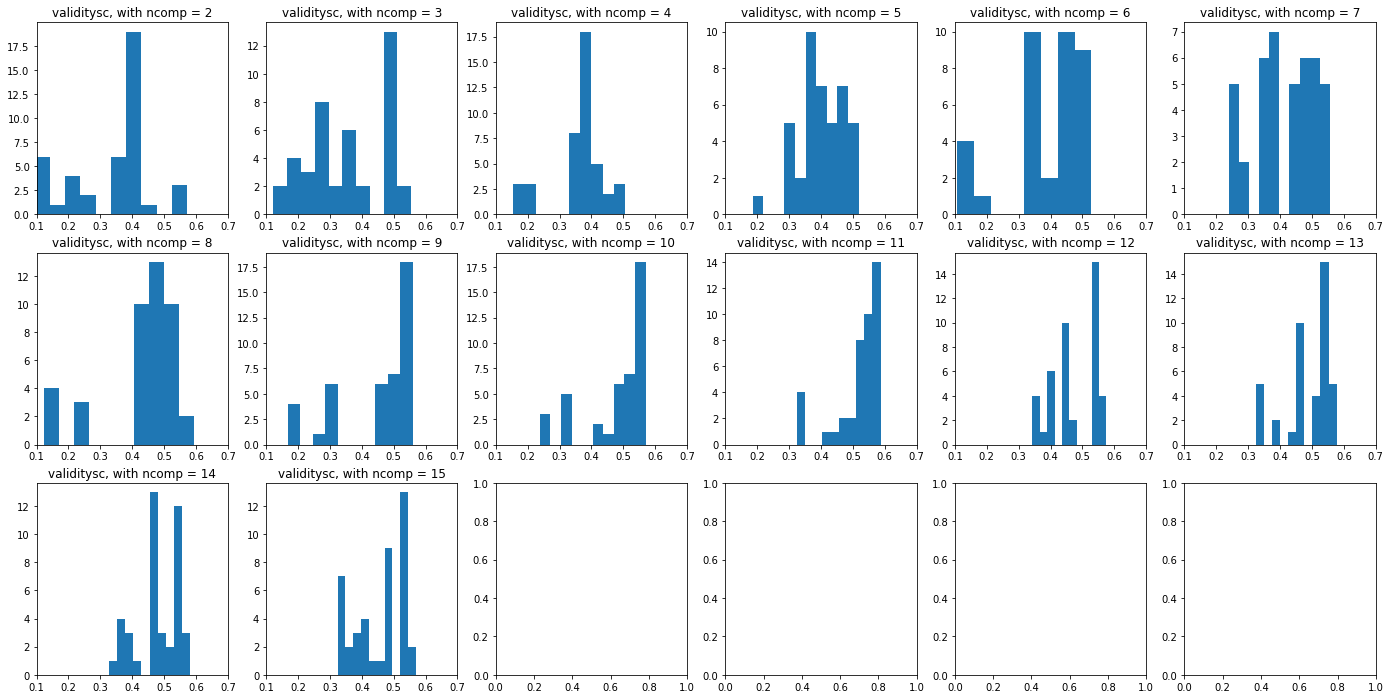

In [96]:
max_cols = 6
vals = set(info['ncomp'])
max_rows = len(vals) // max_cols +1
fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

for idx, val  in enumerate(vals):
    row = idx // max_cols
    col = idx % max_cols
    axes[row,col].hist(info[info['ncomp']==val]['validitysc'])
    axes[row,col].set_title('validitysc, with ncomp = {}'.format(val))
    axes[row,col].set_xlim((.1,.7))

In [104]:
info['validitysc']

0      0.392899
1      0.401014
2      0.401014
3      0.401014
4      0.401014
         ...   
583    0.541406
584    0.527958
585    0.527958
586    0.527958
587    0.527958
Name: validitysc, Length: 588, dtype: float64

In [194]:
refclustering = 1
clus_argsort = np.lexsort((countries,clusdata[refclustering]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata.copy()
clusdata_s = clusdata.copy()
for i in range(len(probdata)):
    foo = probdata[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata[i,clus_argsort[j]]   

In [195]:
np.shape(clusdata)
clusdata

array([[-1,  1, -1, ...,  0,  0, -1],
       [ 1,  2,  0, ...,  0,  0,  0],
       [ 2,  3,  0, ...,  0,  0,  0],
       ...,
       [-1,  2,  2, ..., -1,  0, -1],
       [-1,  4,  4, ..., -1,  0,  3],
       [-1,  4,  4, ..., -1,  0,  3]])

In [196]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
ncols = len(set(clusdata.flatten()))
if ncols>11:
    print('currently only 11 colours allowed', ncols )
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[0.5,1,0],[0,1,0.5],[0.5,0,1],[0.5,1,0.5],[0.3,0.7,0.5]]) # black,red,green,blue,yellow,cyan,magenta
colors = np.concatenate((colors,colors))
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

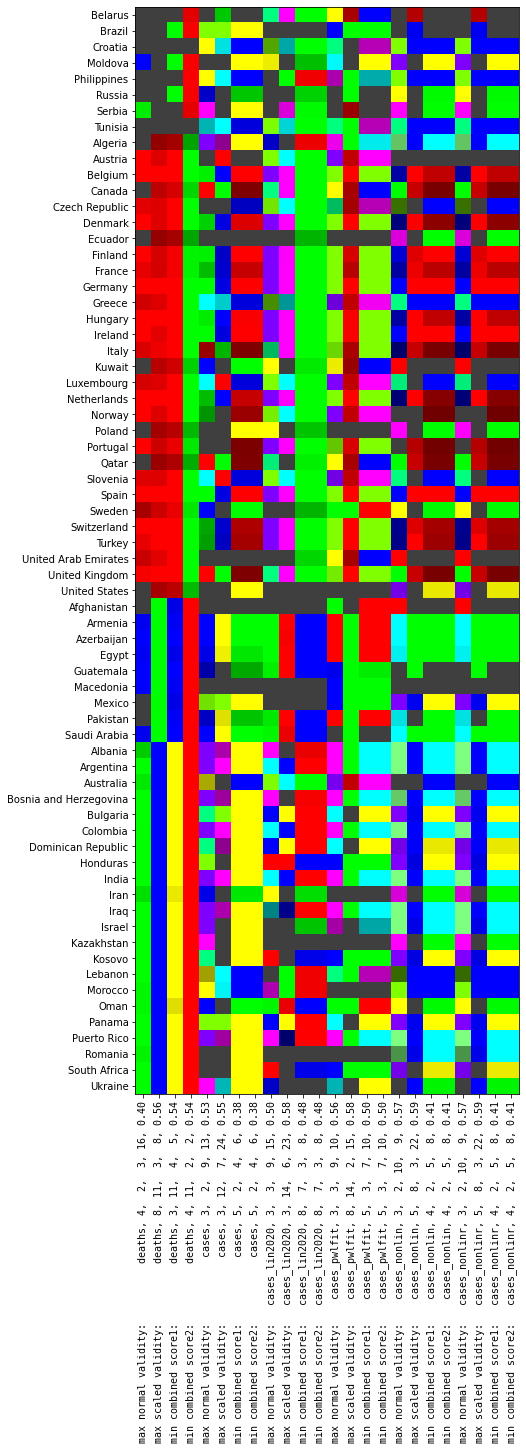

In [197]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')
# fig.colorbar(img)
plt.show()

In [198]:
def score_int(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))
    else:
        return 0 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn
 
from matplotlib import colors as mpcolors

def clust(clustering_a,clustering_b,colors_a,colors_b,relabel=True,merge=True): 
    """ relables clustering b to match clustering a
        if more than one cluster in a optimally matches a particular cluster in b, then color of b is merger of colors in a
        if more than one cluster in b optimally matches a particular cluster in a, then colors in a merged and split for b
    """
    labels_a = list(set(clustering_a))
    labels_b = list(set(clustering_b))
    newcolors_b = np.zeros((len(colors_b),3),dtype=float)
    newcolors_b[:,:] = colors_b[:,:]
            
    a_to_b = {}
    b_to_a = {}
    a_cols = {}
    b_cols = {}
    
    for a in labels_a:
        maxscore = 0
        maxlab = -2
        for b in labels_b:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = b
        a_to_b.update({a:(maxlab,maxscore)})
    maxvals_a_to_b = [a_to_b[a][1] for a in labels_a]
    reorder_a = np.flip(np.argsort(maxvals_a_to_b))
    labels_a_sort = [labels_a[r] for r in list(reorder_a)]

    for b in labels_b:
        maxscore = 0
        maxlab = -2
        for a in labels_a:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = a
        b_to_a.update({b:(maxlab,maxscore)})
    maxvals_b_to_a = [b_to_a[b][1] for b in labels_b]
    reorder_b = np.flip(np.argsort(maxvals_b_to_a))
    labels_b_sort = [labels_b[r] for r in list(reorder_b)]    

    if relabel:    
        for b in labels_b_sort:   # first adjust colors_b to match mapped clusters from a (transfer and merge)
            amap = [a for a in labels_a_sort if a_to_b[a][0] == b]
            for a in amap:
                alist = matchset(clustering_a,a)
                a_cols[a] = colors_a[alist[0]]
            blist = matchset(clustering_b,b)
            if len(amap) > 0:
                h = sum([mpcolors.rgb_to_hsv(a_cols[a])[0] for a in amap])/len(amap) # average hue from amap
                for j in blist:
                    s = mpcolors.rgb_to_hsv(colors_b[j])[1] # take s saturation from b
                    v = mpcolors.rgb_to_hsv(colors_b[j])[2] # take v from b
                    newcolors_b[j,:] = mpcolors.hsv_to_rgb([h,s,v]) # back to rgb  
            b_cols[b] = newcolors_b[blist[0]] # first matching elt colour (to extract hue)
            
    if merge:
        for a in labels_a_sort:   # now readjust colors in b that both map to same a (split)
            bmap = [b for b in labels_b_sort if b_to_a[b][0] == a]
            if len(bmap)>1:                          
                for i,b in enumerate(bmap):
                    blist = matchset(clustering_b,b)
                    h = (mpcolors.rgb_to_hsv(b_cols[b])[0] + mpcolors.rgb_to_hsv(a_cols[a])[0])/2
                    for j in blist:                     
                        s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
                        v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
                        newcolors_b[j,:]= mpcolors.hsv_to_rgb([h,s,v])

    return newcolors_b

In [199]:
coldata_c = coldata.copy()
coldata_t = np.transpose(coldata_c,(1,0,2))

print(np.shape(clusdata_s))
print(np.shape(coldata))
print(np.shape(coldata_t))

clusa = clusdata_s[refclustering]
ca = coldata_t[refclustering]
for i in range(0,len(clusdata_s)):
    if i != refclustering:
        clusb = clusdata_s[i]
        cb = coldata_t[i]
        newcolors_b = clust(clusa,clusb,ca,cb,True,False)
        coldata_t[i,:] = newcolors_b[:]
coldata_adj = np.transpose(coldata_t,(1,0,2))

coldata_c2 = coldata.copy()
coldata_t2 = np.transpose(coldata_c2,(1,0,2))

clusa = clusdata_s[refclustering]
ca = coldata_t2[refclustering]
for i in range(0,len(clusdata_s)):
    if i != refclustering:
        clusb = clusdata_s[i]
        cb = coldata_t2[i]
        newcolors_b = clust(clusa,clusb,ca,cb,True,True)
        coldata_t2[i,:] = newcolors_b[:]
coldata_adj2 = np.transpose(coldata_t2,(1,0,2))

(24, 68)
(68, 24, 3)
(24, 68, 3)


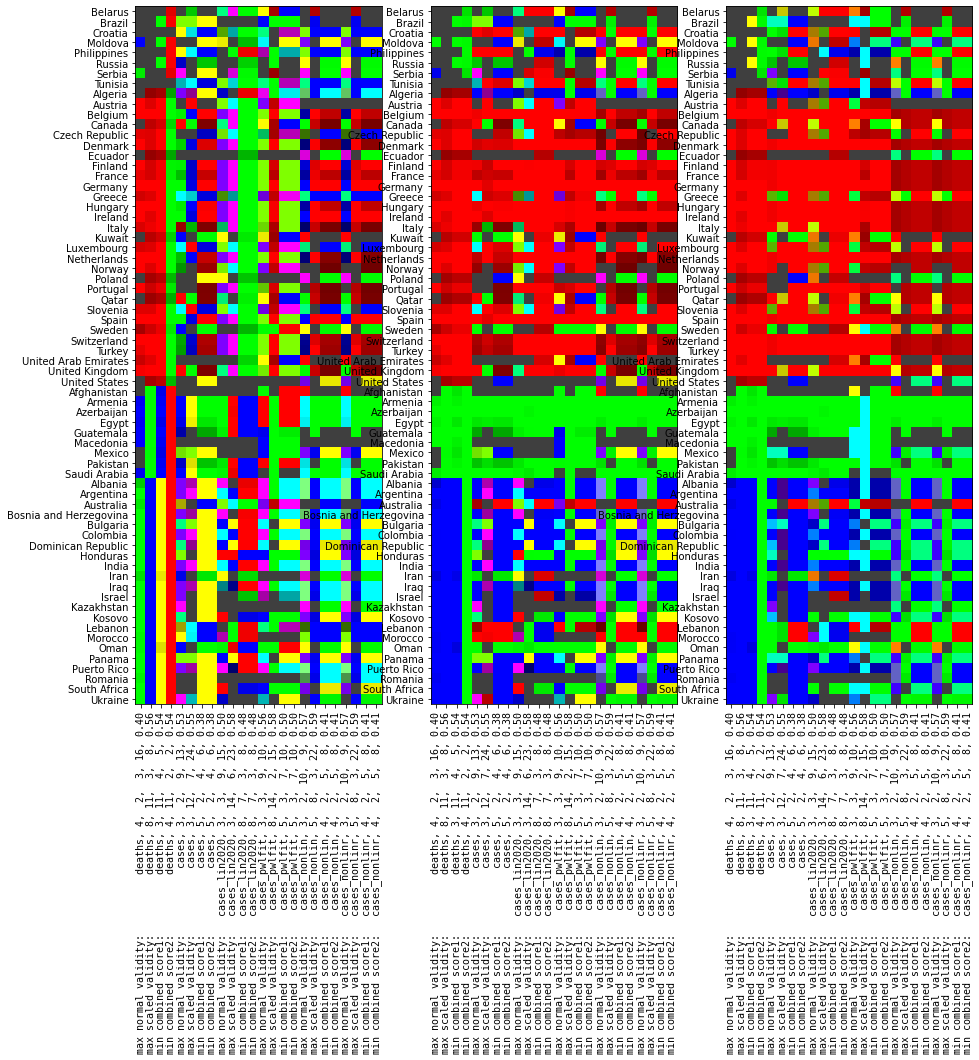

In [200]:
fig,axes = plt.subplots(1,3,figsize=(15,20))

ax = axes[0]
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

ax = axes[1]
img = ax.imshow(coldata_adj)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

ax = axes[2]
img = ax.imshow(coldata_adj2)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')

plt.show()

So the conclusions are: 
* the relabelling phases 1 and 2 are now working
* chosing the right reference column helps : here 1 not 0
* there is pretty good cohesion in the 4 cluster interpretation witht the blue cluster confused by a lot of countries on the blue-green divide

### Conclusions

In [37]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report]

score		case	minc	dim	nclus	unclus	validitysc


['max normal validity:          deaths, 4,  2,  3, 16, 0.40',
 'max scaled validity:          deaths, 8, 11,  3,  8, 0.56',
 'min combined score1:          deaths, 3, 11,  4,  5, 0.54',
 'min combined score2:          deaths, 4, 11,  2,  2, 0.54',
 'max normal validity:           cases, 3,  2,  9, 13, 0.53',
 'max scaled validity:           cases, 3, 12,  7, 24, 0.55',
 'min combined score1:           cases, 5,  2,  4,  6, 0.38',
 'min combined score2:           cases, 5,  2,  4,  6, 0.38',
 'max normal validity:   cases_lin2020, 3,  3,  9, 15, 0.50',
 'max scaled validity:   cases_lin2020, 3, 14,  6, 23, 0.58',
 'min combined score1:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'min combined score2:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'max normal validity:    cases_pwlfit, 3,  3,  9, 10, 0.55',
 'max scaled validity:    cases_pwlfit, 8, 14,  2, 15, 0.58',
 'min combined score1:    cases_pwlfit, 5,  3,  7, 10, 0.50',
 'min combined score2:    cases_pwlfit, 5,  3,  7, 10, 0.50',
 'max no

In [38]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'scaled' in x]

score		case	minc	dim	nclus	unclus	validitysc


['max scaled validity:          deaths, 8, 11,  3,  8, 0.56',
 'max scaled validity:           cases, 3, 12,  7, 24, 0.55',
 'max scaled validity:   cases_lin2020, 3, 14,  6, 23, 0.58',
 'max scaled validity:    cases_pwlfit, 8, 14,  2, 15, 0.58',
 'max scaled validity:    cases_nonlin, 5,  8,  3, 22, 0.59',
 'max scaled validity:   cases_nonlinr, 5,  8,  3, 22, 0.59']

In [39]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'score1' in x]

score		case	minc	dim	nclus	unclus	validitysc


['min combined score1:          deaths, 3, 11,  4,  5, 0.54',
 'min combined score1:           cases, 5,  2,  4,  6, 0.38',
 'min combined score1:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'min combined score1:    cases_pwlfit, 5,  3,  7, 10, 0.50',
 'min combined score1:    cases_nonlin, 4,  2,  5,  8, 0.41',
 'min combined score1:   cases_nonlinr, 4,  2,  5,  8, 0.41']

In [40]:
print('score\t\tcase\tminc\tdim\tnclus\tunclus\tvaliditysc')
[x for x in report if 'score2' in x]

score		case	minc	dim	nclus	unclus	validitysc


['min combined score2:          deaths, 4, 11,  2,  2, 0.54',
 'min combined score2:           cases, 5,  2,  4,  6, 0.38',
 'min combined score2:   cases_lin2020, 8,  7,  3,  8, 0.48',
 'min combined score2:    cases_pwlfit, 5,  3,  7, 10, 0.50',
 'min combined score2:    cases_nonlin, 4,  2,  5,  8, 0.41',
 'min combined score2:   cases_nonlinr, 4,  2,  5,  8, 0.41']

In [ ]:
[(x,info[x]['dim'],info[x]['uclustered'] for x in cases]

#### Scan with 4 scorings to compute best cluster, saving results for comparison

In [25]:
data = clusdata_all['deaths']
clusdata = ClusterFit(clusdata_all['deaths'])
dat = clusdata.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

In [26]:
def rescale(v,d):
    """ functional form of correction factor using simple inversion formula
        for with v2'=1/(1-v2) the dimensionality correction v = v2 * v2'/(v2'+d/2-1)
        projecting equivalent validity at dim = 2"""
    if d > 12.:
        d = 12.
    logd = np.log(d/2.)
    return v*(1.+logd)/(1.+v*logd)

maxvalid = []
maxvalidval= 0.0
maxvalidsc = []
maxvalidscval= 0.0
minscore1 = []
minscore1val = 999.
minscore2 = []
minscore2val = 999.

print('---------------------------------------------------------')
probdata=np.zeros((7*14,len(dat)),dtype=float)
clusdata = np.zeros((7*14,len(countries)),dtype=np.integer)
report = []
count = 0
for minc in range(3,10):
    min_samples = 2
    for ncomp in range(2,16):  # code will only work if reference value 2 included in range
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        nclus = len(set([x for x in labels if x>-1]))
        nclustered = sum([1 for x in labels if x>-1])
        nunclustered = sum([1 for x in labels if x==-1])
        
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            validity = max(validity,0.001)
            validitysc = rescale(validity,ncomp) 
            score1 = 1.0/validitysc + nunclustered/5 + np.abs(nclus-4)/2
            score2 = nunclustered*(4.+np.abs(nclus-4))/(validitysc*20)
          
            if validity > maxvalidval:
                maxvalidval = validity
                maxvalid = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
            if validitysc > maxvalidscval:
                maxvalidscval = validitysc
                maxvalidsc = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]
            if score1 <  minscore1val:
                minscore1val = score1
                minscore1 = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]   
            if score2 <  minscore2val:
                minscore2val = score2
                minscore2 = [(minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2)]

            print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
                  nclus,'clusters;  ',
                  nclustered,'clustered;  ',
                  nunclustered,'unclustered; ','validity =',np.round(validity,5),'validitysc =',np.round(validitysc,5),
                  'score1:',np.round(score1,3),'score2:',np.round(score2,3))
            probdata[count,:] = clusterer.probabilities_[:]
            clusdata[count,:] = labels[:]
            report.append('hdbscan: %2d,%3d,%3d,%3d,%5.2f' % (minc,ncomp,nclus,nunclustered,validitysc))
            
        except:
            validity=None
            print('hdbscan: ',minc,'minc:  ',min_samples,'mins:  ',ncomp ,'FPCAcomponents:  ',
              nclus,'clusters;  ',
              nclustered,'clustered;  ',nunclustered,'unclustered; ','validity =',validity)
            report.append('hdbscan: %2d,%3d,%3d,%3d,%5.2f' % (minc,ncomp,nclus,nunclustered,0.))
        count = count+1
    print('--------------------------')
print('---------------------------------------------------------')
print('minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2')
print('maxvalid ',maxvalid)
print('maxvalidsc ',maxvalidsc)
print('minscore1',minscore1)
print('minscore2',minscore2)

---------------------------------------------------------
hdbscan:  3 minc:   2 mins:   2 FPCAcomponents:   4 clusters;   55 clustered;   13 unclustered;  validity = 0.3929 validitysc = 0.3929 score1: 5.145 score2: 6.617
hdbscan:  3 minc:   2 mins:   3 FPCAcomponents:   4 clusters;   65 clustered;   3 unclustered;  validity = 0.21303 validitysc = 0.2756 score1: 4.228 score2: 2.177
hdbscan:  3 minc:   2 mins:   4 FPCAcomponents:   4 clusters;   62 clustered;   6 unclustered;  validity = 0.14563 validitysc = 0.22396 score1: 5.665 score2: 5.358
hdbscan:  3 minc:   2 mins:   5 FPCAcomponents:   5 clusters;   53 clustered;   15 unclustered;  validity = 0.30613 validitysc = 0.45813 score1: 5.683 score2: 8.185
hdbscan:  3 minc:   2 mins:   6 FPCAcomponents:   6 clusters;   54 clustered;   14 unclustered;  validity = 0.30825 validitysc = 0.48325 score1: 5.869 score2: 8.691
hdbscan:  3 minc:   2 mins:   7 FPCAcomponents:   7 clusters;   56 clustered;   12 unclustered;  validity = 0.26637 validi

hdbscan:  6 minc:   2 mins:   10 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.29064 validitysc = 0.51671 score1: 3.335 score2: 1.161
hdbscan:  6 minc:   2 mins:   11 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.30574 validitysc = 0.54361 score1: 3.24 score2: 1.104
hdbscan:  6 minc:   2 mins:   12 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.22603 validitysc = 0.44913 score1: 3.627 score2: 1.336
hdbscan:  6 minc:   2 mins:   13 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.23169 validitysc = 0.45708 score1: 3.588 score2: 1.313
hdbscan:  6 minc:   2 mins:   14 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.23613 validitysc = 0.46323 score1: 3.559 score2: 1.295
hdbscan:  6 minc:   2 mins:   15 FPCAcomponents:   2 clusters;   66 clustered;   2 unclustered;  validity = 0.24632 validitysc = 0.4771 score1: 3.496 score2: 1.258
------------

In [27]:
minscore2

[(4,
  2,
  11,
  2,
  66,
  2,
  0.30573773401488213,
  0.5436105637969221,
  3.2395521842242427,
  1.1037313105345454)]

In [92]:
# minscore1
minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2 = minscore1[0]

In [93]:
# rerun for optimal parameters
# minscore1 : could use maxvalid or minscore1 instead
minc,min_samples,ncomp,nclus,nclustered,nunclustered,validity,validitysc,score1,score2 = minscore1[0]

food = ClusterFit(clusdata_all['cases_nonlin'])
dat = food.dat
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

fpca_disc = FPCA(n_components=ncomp)
fpca_disc.fit(dat_disc)
foo = fpca_disc.transform(dat_disc)
clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples,gen_min_span_tree=True)
labels = clusterer.fit_predict(foo)
try:
    validity = hdbscan.validity.validity_index(foo, labels)
    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
          len(set([x for x in labels if x>-1])),'clusters;  ',
          sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,5))
except:
    validity=None


    print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
      len(set([x for x in labels if x>-1])),'clusters;  ',
      sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
#print(labels)

hdbscan_min_clus= 4 :   14 FPCAcomponents:   4 clusters;   51 clustered;   17 unclustered;  validity = 0.38309


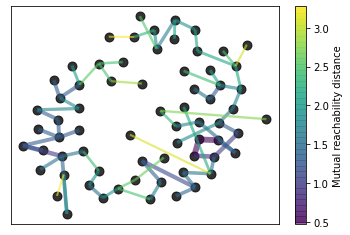

In [94]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=2)

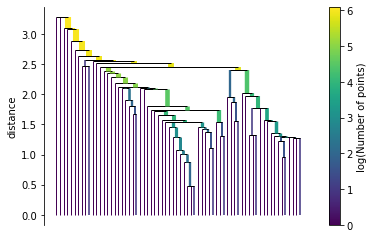

In [95]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

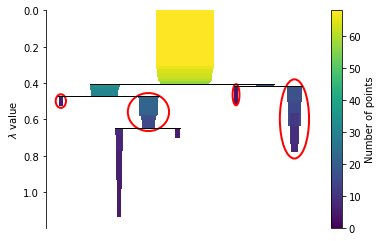

In [96]:
#clusterer.condensed_tree_.plot()
clusterer.condensed_tree_.plot(select_clusters=True)

In [97]:
from sklearn import datasets
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

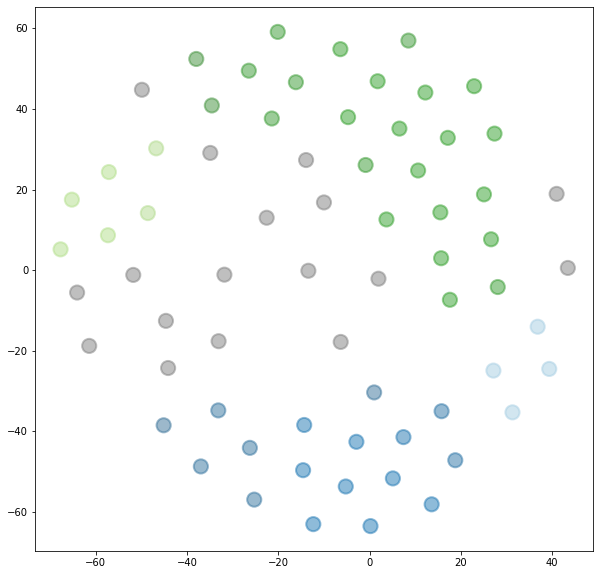

In [98]:
projection = TSNE().fit_transform(dat)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
else (0.5, 0.5, 0.5)
for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
fig,ax = plt.subplots(1,1,figsize=(10,10))
plt.scatter(*projection.T, s=200, linewidth=2, c=cluster_member_colors, alpha=0.5)

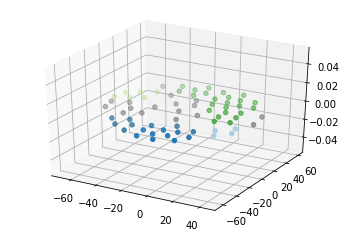

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*projection.T,c=cluster_member_colors)

In [100]:
len(countries)

68

In [101]:
len(probdata[0])

68

#### Comparison of country assignment probs

In [102]:
clus_argsort = np.lexsort((countries,clusdata[0]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata.copy()
clusdata_s = clusdata.copy()
for i in range(len(probdata)):
    foo = probdata[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata[i,clus_argsort[j]]   

In [ ]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
if len(set(clusdata_s))>10:
    print('currently only 10 colours allowed')
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1],[0.5,1,0],[0,1,0.5],[0.5,0,1],[0.5,1,0.5]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

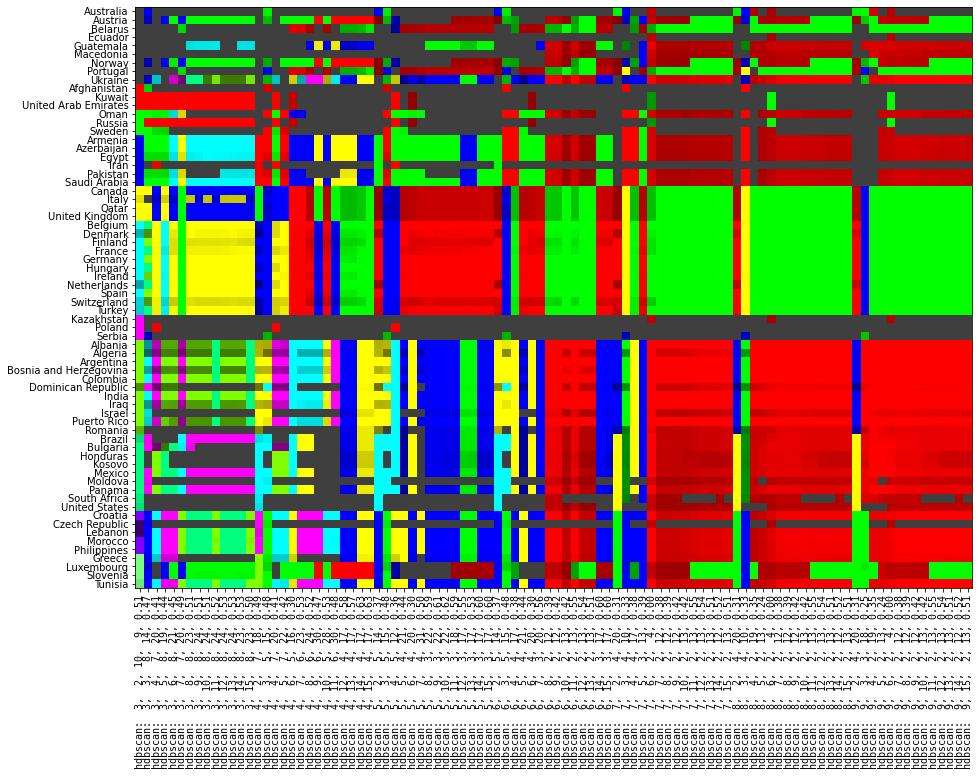

In [104]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report,rotation='vertical')
# fig.colorbar(img)
plt.show()

## 2nd method using basis:

basis = skfda.representation.basis.BSpline(n_basis=20)
basis_dat_disc = dat_disc.to_basis(basis)
basis_dat_disc.plot()

# Clustering comparisons

Matrix density plot :
Columns : different clusterings.
Rows: the countries.

1.	Choose candidate best clustering: this determines labels of clusters
2.	Order countries by this clustering then alphabetically within cluster
3.	For this first clustering complete column with prob of country assignment being correct. Assign one of 3-6 colours to each cluster label. Shade colour intensity with prob. e.g. colours (red, green ,blue, yellow, magenta, cyan)
4.	For next clustering: firstly determine best matches of cluster index to first clustering. If more clusters than best (or for later steps those already registered), add new clusters to cluster list with new colours. Stop at 6 clusters in registered list. Members of further clusters all receive colour black with grey tone.


## PCA clusterings

In [105]:
# redo all clustering compactly 
# Norman I guess you need to substitute this with dbhscan
datasets = [c for c in clusdata_all]
print(datasets)
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    # mfit = ClusterFit(clusdata_all[d],fft='fft') # only 2 clusters for 'deaths'
    mfit.umap_best_cluster(Nclus=3)
    res[d] = mfit

['deaths', 'cases', 'cases_lin2020', 'cases_pwlfit', 'cases_nonlin', 'cases_nonlinr']
doing  deaths ...
found 30 clusterings with size 3 clusters
doing  cases ...
found 16 clusterings with size 3 clusters
doing  cases_lin2020 ...
found 0 clusterings with size 3 clusters
Failed to find a cluster with 3 components
doing  cases_pwlfit ...
found 34 clusterings with size 3 clusters
doing  cases_nonlin ...
found 1 clusterings with size 3 clusters
doing  cases_nonlinr ...
found 1 clusterings with size 3 clusters


In [106]:
clus_argsort = np.lexsort((countries,res['deaths'].clus_labels))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata2 = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2 = np.zeros((len(res),len(countries)),dtype=np.integer)
probdata2s = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata2s = np.zeros((len(res),len(countries)),dtype=np.integer)
for i,rr in enumerate(res):
    foo = res[rr]
    probdata2[i,:] = foo.clus_probs[:]
    clusdata2[i,:] = foo.clus_labels[:]
    for j in range(len(scountries)):
        probdata2s[i,j] = foo.clus_probs[clus_argsort[j]]
        clusdata2s[i,j] = foo.clus_labels[clus_argsort[j]] 

In [107]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata2s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata2s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[1+cindex[:,:]],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose(cluscols*rawdata,(1,2,0))   # transpose back to have colours as elements of 2D array
report2 = ['umap_pca: %16s' % r for r in res]

In [108]:
report2

['umap_pca:           deaths',
 'umap_pca:            cases',
 'umap_pca:    cases_lin2020',
 'umap_pca:     cases_pwlfit',
 'umap_pca:     cases_nonlin',
 'umap_pca:    cases_nonlinr']

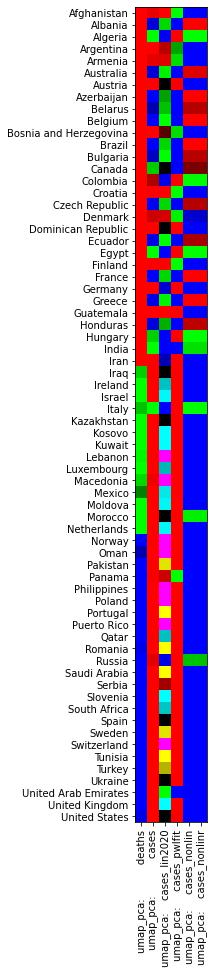

In [109]:
fig,ax = plt.subplots(1,1,figsize=(10,15))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.set_xticks(range(len(res)))
ax.set_xticklabels(report2,rotation='vertical')
# fig.colorbar(img)
plt.show()

## HDBSCAN and PCA clusterings together

In [184]:
clusdata12 = np.concatenate((clusdata,clusdata2))
probdata12 = np.concatenate((probdata,probdata2))
report12 = report + report2
clus_argsort = np.lexsort((countries,clusdata12[0]))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata_s = probdata12.copy()
clusdata_s = clusdata12.copy()
for i in range(len(probdata12)):
    foo = probdata12[i]
    for j in range(len(scountries)):
        probdata_s[i,j] = probdata12[i,clus_argsort[j]]
        clusdata_s[i,j] = clusdata12[i,clus_argsort[j]]   

In [185]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata_s)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata_s)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[cindex[:,:]+1],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose((cluscols+3*cluscols*rawdata)/4.,(1,2,0))   # transpose back to have colours as elements of 2D array

IndexError: index 7 is out of bounds for axis 0 with size 7

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,20))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(scountries)
ax.set_xticks(range(len(clusdata_s)))
plt.setp(ax.get_xticklabels(), rotation='vertical', family='monospace')
ax.set_xticklabels(report12,rotation='vertical')
# fig.colorbar(img)
plt.show()

Mapping between clusters, so that recolor columns to best match 

In [219]:
def score_int(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))
    else:
        return 0 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn
 
from matplotlib import colors as mpcolors

def clust(clustering_a,clustering_b,colors_a,colors_b): 
    """ relables clustering b to match clustering a
        if more than one cluster in a optimally matches a particular cluster in b, then color of b is merger of colors in a
        if more than one cluster in b optimally matches a particular cluster in a, then colors in a merged and split for b
    """
    labels_a = set(clustering_a)
    labels_b = set(clustering_b)
    
    if len(labels_a) != len(colors_a): print('error wrong color list length for a')
    if len(labels_b) != len(colors_b): print('error wrong color list length for b')
            
    a_to_b = {}
    b_to_a = {}
    a_cols = {a : colors_a[i] for i,a in enumerate(labels_a)}
    b_cols = {b : colors_b[i] for i,b in enumerate(labels_b)}
    
    for a in labels_a:
        maxscore = 0
        maxlab = -2
        for b in labels_b:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = b
        a_to_b.update({a:maxlab})

    for b in labels_b:
        maxscore = 0
        maxlab = -2
        for a in labels_a:
            score = score_int(matchset(clustering_a,a),matchset(clustering_b,b))
            if score > maxscore:
                maxscore = score
                maxlab = a
        b_to_a.update({b:maxlab})
    
    for b in labels_b:   # first adjust colors in b to match mapped clusters from a (transfer and merge)
        amap = [a for a in labels_a if a_to_b[a] == b]
        if len(amap) > 0:
            h = sum([mpcolors.rgb_to_hsv(a_cols[a])[0] for a in amap])/len(amap) # average hue from amap
            s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
            v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
            b_cols[b] = mpcolors.hsv_to_rgb([h,s,v]) # back to rgb

    for a in labels_a:   # now readjust colors in b that both map to same a (split)
        bmap = [b for b in labels_b if b_to_a[b] == a]
        if len(bmap)>1:
            h = sum([mpcolors.rgb_to_hsv(b_cols[b])[0] for b in bmap])/len(bmap) # average hue from bmap  
            ha = mpcolors.rgb_to_hsv(a_cols[a])[0]
            hb = np.linspace(abs(h-ha/4.),abs(h+ha/4.),len(bmap))
            #print('hb[',hb[0],hb[1],']',h,ha,ha/4.,abs(h-ha/4.),abs(h+ha/4.))
            for i,b in enumerate(bmap):
                s = mpcolors.rgb_to_hsv(b_cols[b])[1] # take s saturation from b
                #print('s',s)
                v = mpcolors.rgb_to_hsv(b_cols[b])[2] # take v from b
                #print('v',v)
                b_cols[b]= mpcolors.hsv_to_rgb([hb[i],s,v])
                #print('hb[i],b_cols[b]',hb[i],b_cols[b])
    return b_cols,a_to_b,b_to_a

In [220]:
clust([0,1,1,0,2,2,2,0],[1,0,0,1,2,2,2,1],[[1,0,0],[0,1,0],[0,0,1]],[[1,0,0],[0,1,0],[0,0,1]])

({0: array([0., 1., 0.]), 1: array([1., 0., 0.]), 2: array([0., 0., 1.])},
 {0: 1, 1: 0, 2: 2},
 {0: 1, 1: 0, 2: 2})

In [221]:
clust([0,1,1,0,2,2,2,0],[1,0,0,1,2,3,3,1],[[1,0,0],[0,1,0],[0,0,1]],[[1,0,0],[0,1,0],[0,0,1],[1,1,0]])

({0: array([0., 1., 0.]),
  1: array([1., 0., 0.]),
  2: array([0., 1., 1.]),
  3: array([1., 0., 1.])},
 {0: 1, 1: 0, 2: 3},
 {0: 1, 1: 0, 2: 2, 3: 2})

In [ ]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 

def match1(a,x):
    rtn = [1 if a[i] == x else 0 for i in range(len(a)) ]
    return rtn

## Family matching paper

References:
* [the paper](https://hal.inria.fr/hal-01514872/document)
* [the user manual](https://sbl.inria.fr/doc/D_family_matching-user-manual.html)
* [Structural Bioinformatics Library](https://sbl.inria.fr/doc/index.html) C++/python
* [jupyter notebook](https://sbl.inria.fr/demos/D_family_matching.ipynb)
